In [1]:
import warnings
warnings.filterwarnings('ignore', category=DeprecationWarning)
# load pytraj
import pytraj as pt
import plotly.express as px
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.metrics import davies_bouldin_score
import scipy.stats as stats
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.metrics import davies_bouldin_score
import scipy.stats as stats
import plotly.express as px
from sklearn import metrics
from sklearn.metrics import pairwise_distances
from umap import UMAP
plt.rc('xtick',labelsize=12)
plt.rc('ytick',labelsize=12)

### Domain Residue assignment
Assignment as per PDB - 5B2O (Protein - residues 1–1629;N995A) in complex with a 94-nt sgRNA, a 30-nt target DNA
strand, and a 9-nt non-target DNA strand (containing either the 50 -TGG-30 PAM or the 50 -TGA-30 PAM) at 1.7 A˚ resolutions
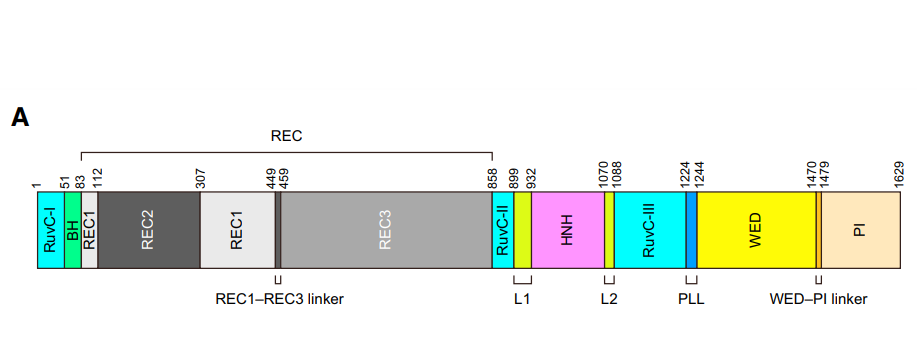

- In this study A995N muation is done. Protein starts from residue 1-1121 (protein), 1623-1715 (sgRNA), 1716 (Zn), 1717-1746 (tDNA), 1747-1764 (ntDNA)  

- RuvC- :1-36,466-514,679-819
- HNH - :559-665
- rec3 - :73-167,181-231 ,
- Rec2 - :232-466
- Rec3 - :459-858
- sgRNA(20bp) :1623-1642
- tDNA (20bp) :1745-1726
- ntDNA-tDNA (:1716-1725,1756-1764)


In [11]:
st_traj=pt.load('St1Cas9-6M0W/St1Cas9-ter-EMX1_nowat_nodt_nowat_500ns.nc','St1Cas9-6M0W/St1Cas9-ter-EMX1_dry.prmtop')
stmm20_traj = pt.load('St1cas9-mm20/St1Cas9-ter-EMX1-mm20_nowat_500ns_nodt.nc', 'St1cas9-mm20/St1Cas9-ter-EMX1-mm20_dry.prmtop') # 500ps, 15000 frames
stmm16_19_traj= pt.load('St1cas9-mm16_19/St1Cas9-ter-EMX1-mm16_19_nowat_nodt_500ns_centered.nc', 'St1cas9-mm16_19/St1Cas9-ter-EMX1-mm16_19_dry.prmtop')
stmm17_20_traj = pt.load('St1cas9-mm17-20/St1Cas9-ter-EMX1-mm17-20_nowat_nodt_500ns.nc', 'St1cas9-mm17-20/St1Cas9-ter-EMX1-mm17-20_dry.prmtop') # 500ps, 15000 frames

In [21]:
st_traj1=pt.load('St1Cas9-6M0W/St1Cas9-ter-EMX1_nowat_nodt_400-500ns_1000frames.nc','St1Cas9-6M0W/St1Cas9-ter-EMX1_dry.prmtop')
stmm20_traj1 = pt.load('St1cas9-mm20/St1Cas9-ter-EMX1-mm20_nowat_400-500ns_1000frames.xtc', 'St1cas9-mm20/St1Cas9-ter-EMX1-mm20_dry.prmtop') # 500ps, 15000 frames
stmm16_19_traj1= pt.load('St1cas9-mm16_19/St1Cas9-ter-EMX1-mm16_19_nowat_nodt_400-500ns_1000frames.xtc', 'St1cas9-mm16_19/St1Cas9-ter-EMX1-mm16_19_dry.prmtop')
stmm17_20_traj1 = pt.load('St1cas9-mm17-20/St1Cas9-ter-EMX1-mm17-20_nowat_nodt_400-500ns_1000frames.nc', 'St1cas9-mm17-20/St1Cas9-ter-EMX1-mm17-20_dry.prmtop') # 500ps, 15000 frames

In [12]:
st_rmsd= list(pt.rmsd(st_traj, ref=0, mask='@C,CA,N,O'))
stmm20_rmsd= list(pt.rmsd(stmm20_traj, ref=0, mask='@C,CA,N,O'))
stmm16_19_rmsd= list(pt.rmsd(stmm16_19_traj, ref=0, mask='@C,CA,N,O'))
stmm17_20_rmsd= list(pt.rmsd(stmm17_20_traj , ref=0, mask='@C,CA,N,O'))

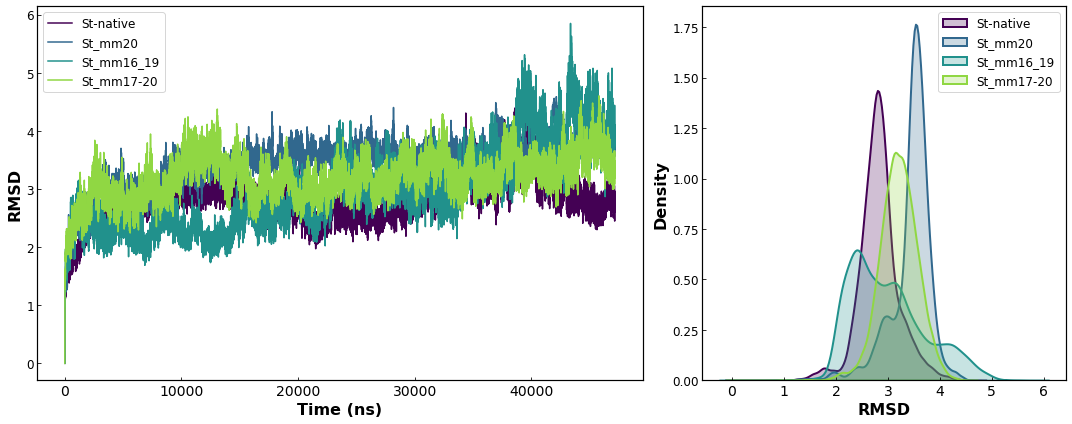

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Sample data (replace with your own data)
data_rmsd_fn = pd.DataFrame(list(zip(st_rmsd, stmm20_rmsd, stmm16_19_rmsd, stmm17_20_rmsd)),
                            columns=['RMSD_st_native', 'RMSD_st_mm20', 'RMSD_st_mm16_19', 'RMSD_st_mm17-20'])

# Create the main plot using gridfnec
color_dict=['#440154','#31688e','#21918c','#90d743']
fig = plt.figure(figsize=(15, 6))
gs = fig.add_gridspec(1, 2, width_ratios=[2.5, 1.5])

# Create the RMSD plot
ax1 = fig.add_subplot(gs[0])
data_rmsd_fn.plot(ax=ax1, color=color_dict)
plt.legend(['St-native', 'St_mm20', 'St_mm16_19', 'St_mm17-20'], fontsize=12)
plt.ylabel('RMSD', fontsize=16, fontweight='bold')
plt.xlabel('Time (ns)',fontsize=16, fontweight='bold')
ax1.spines['left'].set_linewidth(1.2)
ax1.spines['bottom'].set_linewidth(1.2)
ax1.spines['top'].set_linewidth(1.2)
ax1.spines['right'].set_linewidth(1.2)
plt.xticks(rotation=0, fontsize=14)
plt.yticks(fontsize=12)
plt.tick_params(axis='x', direction='in')
plt.tick_params(axis='y', direction='in')

# Create the density plot on the right
ax2 = fig.add_subplot(gs[1])
sns.kdeplot(data=data_rmsd_fn['RMSD_st_native'], ax=ax2, color=color_dict[0], label='St-native', fill=True,linewidth=2)
sns.kdeplot(data=data_rmsd_fn['RMSD_st_mm20'], ax=ax2, color=color_dict[1], label='St_mm20', fill=True, linewidth=2)
sns.kdeplot(data=data_rmsd_fn['RMSD_st_mm16_19'], ax=ax2, color=color_dict[2], label='St_mm16_19', fill=True, linewidth=2)
sns.kdeplot(data=data_rmsd_fn['RMSD_st_mm17-20'], ax=ax2, color=color_dict[3], label='St_mm17-20', fill=True, linewidth=2)
plt.xlabel('RMSD', fontsize=16, fontweight='bold')
plt.ylabel('Density', fontsize=16, fontweight='bold')
plt.legend(fontsize=12)
ax2.spines['left'].set_linewidth(1.2)
ax2.spines['bottom'].set_linewidth(1.2)
ax2.spines['top'].set_linewidth(1.2)
ax2.spines['right'].set_linewidth(1.2)
plt.xticks(rotation=0, fontsize=14)
plt.yticks(fontsize=12)
plt.tick_params(axis='x', direction='in')
plt.tick_params(axis='y', direction='in')
plt.tight_layout()

#plt.savefig('figures/StCas9_all_RMSD-prot_with_density_subplot.svg')
plt.show()


In [14]:
data_rmsd_fn=data_rmsd_fn.stack().reset_index().sort_values(by=['level_1'], ascending=False).iloc[:,1:]
data_rmsd_fn.columns=['Label','RMSD']
data_rmsd_fn.to_csv('StCas9_all-hybrid_RMSD_protein.csv', index=False)
data_rmsd_fn.head()

,Label,RMSD
0,RMSD_st_native,0.000003
87988,RMSD_st_native,2.473494
88052,RMSD_st_native,2.310690
88048,RMSD_st_native,2.437632
88044,RMSD_st_native,2.244992


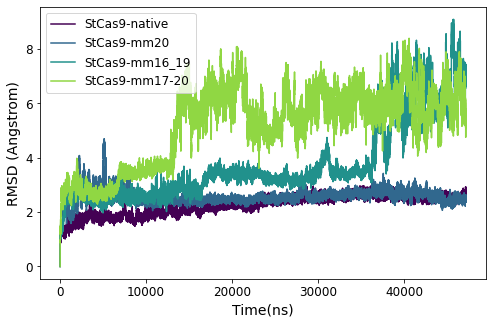

In [15]:
from matplotlib import pyplot as plt
import pandas as pd
st_dup_rmsd=list(pt.rmsd(st_traj, ref=0, mask=':1125-1144,1203-1222'))
stmm20_dup_rmsd=list(pt.rmsd(stmm20_traj, ref=0, mask=':1125-1144,1203-1222'))
stmm16_19_dup_rmsd=list(pt.rmsd(stmm16_19_traj, ref=0, mask=':1125-1144,1203-1222'))
stmm17_20_dup_rmsd=list(pt.rmsd(stmm17_20_traj, ref=0, mask=':1125-1144,1203-1222'))
dup_rmsd=pd.DataFrame(list(zip(st_dup_rmsd,stmm20_dup_rmsd,stmm16_19_dup_rmsd,stmm17_20_dup_rmsd)), columns=['St_native','St_mm20','St_mm16_19','St_mm17-20'])

# #color_dict=['#563761','#A7425C','#F3825F','#FFE26F']
# color_dict=['#440154','#31688e','#21918c','#90d743']
dup_rmsd.plot(color=color_dict)
plt.legend(['StCas9-native','StCas9-mm20','StCas9-mm16_19','StCas9-mm17-20'],fontsize=12)
plt.ylabel('RMSD (Angstrom)', fontsize=14)
plt.xlabel('Time(ns)',fontsize=14)
#plt.title('Backbone after lsq fit to Backbone')
plt.gcf().set_size_inches(8, 5)

In [16]:
dup_rmsd=dup_rmsd.stack().reset_index().sort_values(by=['level_1'], ascending=False).iloc[:,1:]
dup_rmsd.columns=['Label','RMSD']
dup_rmsd.to_csv('StCas9_all-hybrid_RMSD_duplex.csv', index=False)
dup_rmsd.head()

,Label,RMSD
0,St_native,0.000000
87988,St_native,2.201710
88052,St_native,2.286222
88048,St_native,2.335084
88044,St_native,2.265553


In [17]:
# calculate rmsd with reference as 0-th frame, backbone heavy atoms
st_rmsd_first= list(pt.rmsd(st_traj1, ref=0, mask='@C,CA,N,O'))
st_rg = list(pt.radgyr(st_traj1, mask='@CA'))
#st_rmsf=list(pt.rmsf(st_traj,'@CA'))
st_sec=list(pt.dssp(st_traj1, ":1-1121"))
st_surf=list(pt.molsurf(st_traj1, '@C,CA,N,O'))
st_prot = list(pt.search_hbonds(st_traj1, ':1-1121'))
res_fn, ss_fn, _ = list(pt.dssp(st_traj1, simplified=True))
#print(data_rmsd_first)

stmm20_rmsd_first= list(pt.rmsd(stmm20_traj1, ref=0, mask='@C,CA,N,O'))
stmm20_rg = list(pt.radgyr(stmm20_traj1, mask='@CA'))
#stmm20_rmsf=list(pt.rmsf(stmm20_traj,'@CA'))
stmm20_sec=list(pt.dssp(stmm20_traj1, ":1-1121"))
stmm20_surf=list(pt.molsurf(stmm20_traj1, '@C,CA,N,O'))
stmm20_prot = list(pt.search_hbonds(stmm20_traj1, ':1-1121'))
res_stmm20, ss_stmm20, _ = list(pt.dssp(stmm20_traj1, simplified=True))

stmm16_19_rmsd_first= list(pt.rmsd(stmm16_19_traj1, ref=0, mask='@C,CA,N,O'))
stmm16_19_rg = list(pt.radgyr(stmm16_19_traj1, mask='@CA'))
stmm16_19_sec=list(pt.dssp(stmm16_19_traj1, ":1-1121"))
stmm16_19_surf=list(pt.molsurf(stmm16_19_traj1, '@C,CA,N,O'))
stmm16_19_prot = list(pt.search_hbonds(stmm16_19_traj1, ':1-1121'))
res_stmm16_19, ss_stmm16_19, _ = list(pt.dssp(stmm16_19_traj1, simplified=True))

stmm17_20_rmsd_first= list(pt.rmsd(stmm17_20_traj, ref=0, mask='@C,CA,N,O'))
stmm17_20_rg = list(pt.radgyr(stmm17_20_traj1, mask='@CA'))
stmm17_20_sec=list(pt.dssp(stmm17_20_traj1, ":1-1121"))
stmm17_20_surf=list(pt.molsurf(stmm17_20_traj1, '@C,CA,N,O'))
stmm17_20_prot = list(pt.search_hbonds(stmm17_20_traj1, ':1-1121'))
res_stmm17_20, ss_stmm17_20, _ = list(pt.dssp(stmm17_20_traj1, simplified=True))

In [18]:
import pandas as pd # 
data_rmsd_first=pd.DataFrame(list(zip(st_rmsd_first,stmm20_rmsd_first,stmm16_19_rmsd_first,stmm17_20_rmsd_first)), columns=['RMSD_st_native','RMSD_st_mm20','RMSD_st_mm16-19','RMSD_st_mm17-20'])
data_rg = pd.DataFrame(list(zip(st_rg,stmm20_rg,stmm16_19_rg,stmm17_20_rg)), columns=['ROG_st_native','ROG_st_mm20','ROG_st_mm16-19','ROG_st_mm17-20'])
#data_rmsf=pd.DataFrame(list(zip(st_rmsf.T,stmm20_rmsf.T)), columns=['RMSF_st_native','RMSF_st_mm20'])
data_sec=pd.DataFrame(list(zip(st_sec,stmm20_sec,stmm16_19_sec,stmm17_20_sec)), columns=['Sec_st_native','Sec_st_mm20','Sec_st_mm16-19','Sec_st_mm17-20'])
data_surf=pd.DataFrame(list(zip(st_surf,stmm20_surf,stmm16_19_surf,stmm17_20_surf)), columns=['SASA_st_native','SASA_st_mm20','SASA_st_mm16-19','SASA_st_mm17-20'])
data_prot = pd.DataFrame(list(zip(st_prot,stmm20_prot,stmm16_19_prot,stmm17_20_prot)), columns=['Hbonds_st_native','Hbonds_st_mm20','Hbonds_st_mm16-19','Hbonds_st_mm17-20'])
data_prot.head()

,Hbonds_st_native,Hbonds_st_mm20,Hbonds_st_mm16-19,Hbonds_st_mm17-20
0,"[557, 585, 553, 543, 559, 566, 537, 558, 550, ...","[559, 547, 550, 551, 531, 549, 557, 550, 560, ...","[554, 540, 550, 560, 550, 557, 569, 543, 513, ...","[562, 552, 552, 562, 535, 538, 534, 562, 540, ..."
1,"[1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, ...","[1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, ...","[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, ...","[1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, ...","[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,"[1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, ...","[1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, ...","[1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, ..."
4,"[1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, ...","[1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, ...","[1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, ...","[1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, ..."


## Analysis using trajectory with dt

In [22]:
# Stablpe part of trajectory 300-500ns, 1000 frames
# traj1=st_traj[25000:45000:20]
# traj2=stmm20_traj[30000:50000:20]
# traj3=stmm16_19_traj[30000:50000:20]
# traj4=stmm17_20_traj[30000:50000:20]


traj1=st_traj1
traj2=stmm20_traj1
traj3=stmm16_19_traj1
traj4=stmm17_20_traj1

In [ ]:
# # load trajectory to memory
# traj1=pt.load('/storage3/gayatrip/EMX1-St_native_rep/StCas9_repeat_md_0-500ns_nowat_500frames.nc','/storage3/gayatrip/EMX1-St_native_rep/5b2o_emx1_nat_nowat_noNA.prmtop')
# traj2 = pt.load('/storage3/gayatrip/EMX1-St_mm20/repeat/5b2o_mm20_emx1_duplex_nowat_0-500ns_500frames.nc', '/storage3/gayatrip/EMX1-St_mm20/repeat/5b2o_mm20_emx1_duplex_nowat_noNA.prmtop') # 500ps, 15000 frames
# traj3= pt.load('/storage3/gayatrip/EMX1_St_mm16_19/5b2o_mm16_19_emx1_duplex_nowat_0-500ns_500frames.nc', '/storage3/gayatrip/EMX1_St_mm16_19/5b2o_mm16_19_nowat_noNA.prmtop')
# traj4= pt.load('/storage3/gayatrip/EMX1-St_mm17-20/5b2omm17-20_emx1_duplex_nowat_0-500ns_500frames.nc', '/storage3/gayatrip/EMX1-St_mm17-20/5b2omm17-20_emx1_nowat_noNA.prmtop') # 500ps, 15000 frames
# # spmm17_20_traj = pt.load(root_dir+ 'sp_mm17-20/5f9r_mm17-20_nowat_combined_500ns_last.nc', root_dir+'sp_mm17-20/5f9r_mm17-20_nowat_noNA.prmtop') # 500ps, 15000 frames


In [ ]:
# # load trajectory to memory stable part of trajectory
# traj1=pt.load('/storage3/gayatrip/EMX1-St_native_rep/StCas9_repeat_md_0-500ns_nowat_300-500ns-1000frames.nc','/storage3/gayatrip/EMX1-St_native_rep/5b2o_emx1_nat_nowat_noNA.prmtop')
# traj2 = pt.load('/storage3/gayatrip/EMX1-St_mm20/repeat/5b2o_mm20_emx1_duplex_nowat_300-500ns_1000frames.nc', '/storage3/gayatrip/EMX1-St_mm20/repeat/5b2o_mm20_emx1_duplex_nowat_noNA.prmtop') # 500ps, 15000 frames
# traj3= pt.load('/storage3/gayatrip/EMX1_St_mm16_19/5b2o_mm16_19_emx1_duplex_nowat_300-500ns_1000frames.nc', '/storage3/gayatrip/EMX1_St_mm16_19/5b2o_mm16_19_nowat_noNA.prmtop')
# traj4= pt.load('/storage3/gayatrip/EMX1-St_mm17-20/5b2omm17-20_emx1_duplex_nowat_300-500ns_1000frames.nc', '/storage3/gayatrip/EMX1-St_mm17-20/5b2omm17-20_emx1_nowat_noNA.prmtop') # 500ps, 15000 frames
# # spmm17_20_traj = pt.load(root_dir+ 'sp_mm17-20/5f9r_mm17-20_nowat_combined_500ns_last.nc', root_dir+'sp_mm17-20/5f9r_mm17-20_nowat_noNA.prmtop') # 500ps, 15000 frames


In [ ]:
traj4

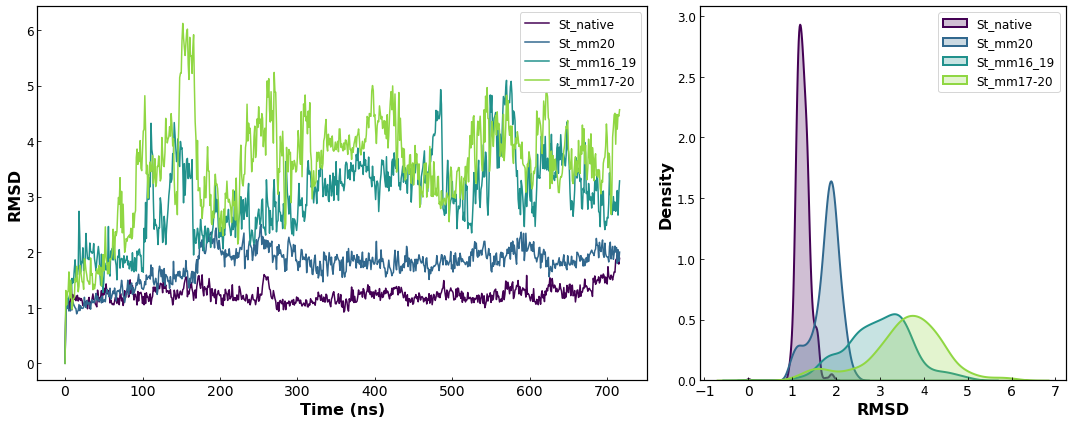

In [23]:
from matplotlib import pyplot as plt
import pandas as pd
st_dup_rmsd=list(pt.rmsd(traj1, ref=0, mask=':1125-1144,1203-1222'))
stmm20_dup_rmsd=list(pt.rmsd(traj2, ref=0, mask=':1125-1144,1203-1222'))
stmm16_19_dup_rmsd=list(pt.rmsd(traj3, ref=0, mask=':1125-1144,1203-1222'))
stmm17_20_dup_rmsd=list(pt.rmsd(traj4, ref=0, mask=':1125-1144,1203-1222'))
dup_rmsd=pd.DataFrame(list(zip(st_dup_rmsd,stmm20_dup_rmsd,stmm16_19_dup_rmsd,stmm17_20_dup_rmsd)), columns=['St_native','St_mm20','St_mm16_19','St_mm17-20'])

color_dict=['#440154','#31688e','#21918c','#90d743']
fig = plt.figure(figsize=(15, 6))
gs = fig.add_gridspec(1, 2, width_ratios=[2.5, 1.5])

# Create the RMSD plot
ax1 = fig.add_subplot(gs[0])
dup_rmsd.plot(ax=ax1, color=color_dict)
plt.legend(['St_native', 'St_mm20', 'St_mm16_19', 'St_mm17-20'], fontsize=12)
plt.ylabel('RMSD', fontsize=16, fontweight='bold')
plt.xlabel('Time (ns)',fontsize=16, fontweight='bold')
ax1.spines['left'].set_linewidth(1.2)
ax1.spines['bottom'].set_linewidth(1.2)
ax1.spines['top'].set_linewidth(1.2)
ax1.spines['right'].set_linewidth(1.2)
plt.xticks(rotation=0, fontsize=14)
plt.yticks(fontsize=12)
plt.tick_params(axis='x', direction='in')
plt.tick_params(axis='y', direction='in')

# Create the density plot on the right
ax2 = fig.add_subplot(gs[1])
sns.kdeplot(data=dup_rmsd['St_native'], ax=ax2, color=color_dict[0], label='St_native', fill=True,linewidth=2)
sns.kdeplot(data=dup_rmsd['St_mm20'], ax=ax2, color=color_dict[1], label='St_mm20', fill=True, linewidth=2)
sns.kdeplot(data=dup_rmsd['St_mm16_19'], ax=ax2, color=color_dict[2], label='St_mm16_19', fill=True, linewidth=2)
sns.kdeplot(data=dup_rmsd['St_mm17-20'], ax=ax2, color=color_dict[3], label='St_mm17-20', fill=True, linewidth=2)
plt.xlabel('RMSD', fontsize=16, fontweight='bold')
plt.ylabel('Density', fontsize=16, fontweight='bold')
plt.legend(fontsize=12)
ax2.spines['left'].set_linewidth(1.2)
ax2.spines['bottom'].set_linewidth(1.2)
ax2.spines['top'].set_linewidth(1.2)
ax2.spines['right'].set_linewidth(1.2)
plt.xticks(rotation=0, fontsize=14)
plt.yticks(fontsize=12)
plt.tick_params(axis='x', direction='in')
plt.tick_params(axis='y', direction='in')
plt.tight_layout()
plt.savefig('StCas9_all_RMSD-duplex_with_density-stable-part_subplot.svg')
plt.show()

In [24]:
dup_rmsd_save=dup_rmsd.stack().reset_index().sort_values(by=['level_1'], ascending=False).iloc[:,1:]
dup_rmsd_save.columns=['Label','RMSD']
dup_rmsd_save.to_csv('StCas9_all-hybrid_RMSD.csv', index=False)
dup_rmsd_save.head()

,Label,RMSD
0,St_native,3.008739e-07
924,St_native,1.151186e+00
892,St_native,1.146087e+00
896,St_native,1.146551e+00
2268,St_native,1.145601e+00


In [ ]:
# # calculate rmsd with reference as 0-th frame, backbone heavy atoms
# st_rmsd_first= list(pt.rmsd(traj1, ref=0, mask='@C,CA,N,O'))
# st_rg = list(pt.radgyr(traj1, mask='@CA'))
# #st_rmsf=list(pt.rmsf(traj1,'@CA'))
# st_sec=list(pt.dssp(traj1, ":1-1121"))
# st_surf=list(pt.molsurf(traj1, '@C,CA,N,O'))
# st_prot = list(pt.search_hbonds(traj1, ':1-1121'))
# res_fn, ss_fn, _ = list(pt.dssp(traj1, simplified=True))
# #print(data_rmsd_first)

# stmm20_rmsd_first= list(pt.rmsd(traj2, ref=0, mask='@C,CA,N,O'))
# stmm20_rg = list(pt.radgyr(traj2, mask='@CA'))
# #stmm20_rmsf=list(pt.rmsf(traj2,'@CA'))
# stmm20_sec=list(pt.dssp(traj2, ":1-1121"))
# stmm20_surf=list(pt.molsurf(traj2, '@C,CA,N,O'))
# stmm20_prot = list(pt.search_hbonds(traj2, ':1-1121'))
# res_stmm20, ss_stmm20, _ = list(pt.dssp(traj2, simplified=True))

# stmm16_19_rmsd_first= list(pt.rmsd(traj3, ref=0, mask='@C,CA,N,O'))
# stmm16_19_rg = list(pt.radgyr(traj3, mask='@CA'))
# stmm16_19_sec=list(pt.dssp(traj3, ":1-1121"))
# stmm16_19_surf=list(pt.molsurf(traj3, '@C,CA,N,O'))
# stmm16_19_prot = list(pt.search_hbonds(traj3, ':1-1121'))
# res_stmm16_19, ss_stmm16_19, _ = list(pt.dssp(traj3, simplified=True))

In [ ]:
# stmm17_20_rmsd_first= list(pt.rmsd(traj4, ref=0, mask='@C,CA,N,O'))
# stmm17_20_rg = list(pt.radgyr(traj4, mask='@CA'))
# stmm17_20_sec=list(pt.dssp(traj4, ":1-1121"))
# stmm17_20_surf=list(pt.molsurf(traj4, '@C,CA,N,O'))
# stmm17_20_prot = list(pt.search_hbonds(traj4, ':1-1121'))
# res_stmm17_20, ss_stmm17_20, _ = list(pt.dssp(traj4, simplified=True))

In [26]:
## ROG domain wise
# RuvC- :1-36,466-514,679-819
# HNH - :559-665
# rec3 - :73-167,181-231 ,
# Rec2 - :232-466
# Rec3 - :459-858
# WED - :820-963
#PI - :963-1121
# sgRNA(20bp) :1623-1642
# tDNA (20bp) :1745-1726
# ntDNA-tDNA (:1716-1725,1756-1764)

st_rg_ruvc = list(pt.radgyr(traj1, mask=':1-36,466-514,679-819'))
stmm20_rg_ruvc = list(pt.radgyr(traj2, mask=':1-36,466-514,679-819'))
stmm16_19_rg_ruvc = list(pt.radgyr(traj3, mask=':1-36,466-514,679-819'))
stmm17_20_rg_ruvc = list(pt.radgyr(traj4, mask=':1-36,466-514,679-819'))

st_rg_hnh = list(pt.radgyr(traj1, mask=':559-665'))
stmm20_rg_hnh = list(pt.radgyr(traj2, mask=':559-665'))
stmm16_19_rg_hnh = list(pt.radgyr(traj3, mask=':559-665'))
stmm17_20_rg_hnh = list(pt.radgyr(traj4, mask=':559-665'))

st_rg_rec1= list(pt.radgyr(traj1, mask=':73-167,181-231 '))
stmm20_rg_rec1= list(pt.radgyr(traj2, mask=':73-167,181-231 '))
stmm16_19_rg_rec1= list(pt.radgyr(traj3, mask=':73-167,181-231 '))
stmm17_20_rg_rec1= list(pt.radgyr(traj4, mask=':73-167,181-231 '))

st_rg_rec2= list(pt.radgyr(traj1, mask=':232-466'))
stmm20_rg_rec2= list(pt.radgyr(traj2, mask=':232-466'))
stmm16_19_rg_rec2= list(pt.radgyr(traj3, mask=':232-466'))
stmm17_20_rg_rec2= list(pt.radgyr(traj4, mask=':232-466'))

# st_rg_rec3= list(pt.radgyr(traj1, mask=':459-858'))
# stmm20_rg_rec3= list(pt.radgyr(traj2, mask=':459-858'))
# stmm16_19_rg_rec3= list(pt.radgyr(traj3, mask=':459-858'))
# stmm17_20_rg_rec3= list(pt.radgyr(traj4, mask=':459-858'))

st_rg_wed= list(pt.radgyr(traj1, mask=':820-963'))
stmm20_rg_wed= list(pt.radgyr(traj2, mask=':820-963'))
stmm16_19_rg_wed= list(pt.radgyr(traj3, mask=':820-963'))
stmm17_20_rg_wed= list(pt.radgyr(traj4, mask=':820-963'))

st_rg_pi= list(pt.radgyr(traj1, mask=':963-1121'))
stmm20_rg_pi= list(pt.radgyr(traj2, mask=':963-1121'))
stmm16_19_rg_pi= list(pt.radgyr(traj3, mask=':963-1121'))
stmm17_20_rg_pi= list(pt.radgyr(traj4, mask=':963-1121'))

data_rg_ruvc = pd.DataFrame(list(zip(st_rg_ruvc,stmm20_rg_ruvc,stmm16_19_rg_ruvc,stmm17_20_rg_ruvc)), columns=['St_native-RuvC','St_mm20-RuvC','St_mm16-19-RuvC','St_mm17-20-RuvC'])
data_rg_hnh = pd.DataFrame(list(zip(st_rg_hnh,stmm20_rg_hnh,stmm16_19_rg_hnh,stmm17_20_rg_hnh)), columns=['St_native-HNH','St_mm20-HNH','St_mm16-19-HNH','St_mm17-20-HNH'])
data_rg_rec1 = pd.DataFrame(list(zip(st_rg_rec1,stmm20_rg_rec1,stmm16_19_rg_rec1,stmm17_20_rg_rec1)), columns=['St_native-REC1','St_mm20-REC1','St_mm16-19-REC1','St_mm17-20-REC1'])
data_rg_rec2 = pd.DataFrame(list(zip(st_rg_rec2,stmm20_rg_rec2,stmm16_19_rg_rec2,stmm17_20_rg_rec2)), columns=['St_native-REC2','St_mm20-REC2','St_mm16-19-REC2','St_mm17-20-REC2'])
#data_rg_rec3 = pd.DataFrame(list(zip(st_rg_rec3,stmm20_rg_rec3,stmm16_19_rg_rec3,stmm17_20_rg_rec3)), columns=['St_native-REC3','St_mm20-REC3','St_mm16-19-REC3','St_mm17-20-REC3'])
data_rg_wed = pd.DataFrame(list(zip(st_rg_wed,stmm20_rg_wed,stmm16_19_rg_wed,stmm17_20_rg_wed)), columns=['St_native-WED','St_mm20-WED','St_mm16-19-WED','St_mm17-20-WED'])
data_rg_pi = pd.DataFrame(list(zip(st_rg_pi,stmm20_rg_pi,stmm16_19_rg_pi,stmm17_20_rg_pi)), columns=['St_native-PI','St_mm20-PI','St_mm16-19-PI','St_mm17-20-PI'])

  Domains  St_native    St_mm20  St_mm16-19  St_mm17-20
0    RuVC  19.392829  19.266043   19.467616   19.091187
1     HNH  13.374426  13.429833   13.447841   13.554512
2    REC1  16.945831  16.675444   17.005719   16.890582
3    REC2  20.974394  20.619198   20.458925   20.672937
4     WED  18.191345  18.448051   18.244809   18.129554
5      PI  16.435183  16.359446   16.379086   16.393203
  Domains  St_native   St_mm20  St_mm16-19  St_mm17-20
0    RuVC   0.261477  0.311951    0.264699    0.164899
1     HNH   0.058287  0.053696    0.054288    0.057102
2    REC1   0.079911  0.099519    0.083663    0.071598
3    REC2   0.139321  0.116594    0.118719    0.115027
4     WED   0.191954  0.213037    0.147556    0.188205
5      PI   0.067655  0.080923    0.069094    0.072658


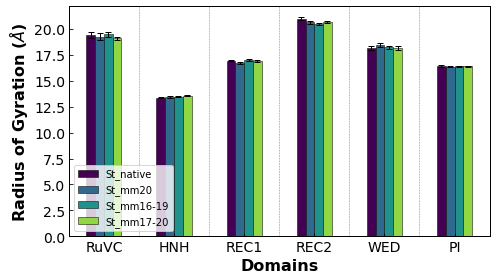

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate mean values
mean_ruvc = data_rg_ruvc.mean()
mean_hnh = data_rg_hnh.mean()
mean_rec1 = data_rg_rec1.mean()
mean_rec2 = data_rg_rec2.mean()
mean_wed = data_rg_wed.mean()
mean_pi = data_rg_pi.mean()

# Calculate standard deviation values
std_ruvc = data_rg_ruvc.std()
std_hnh = data_rg_hnh.std()
std_rec1 = data_rg_rec1.std()
std_rec2 = data_rg_rec2.std()
std_wed = data_rg_wed.std()
std_pi = data_rg_pi.std()

# Replace the mean values in the code accordingly
df_mean = pd.DataFrame([
    ['RuVC', mean_ruvc['St_native-RuvC'], mean_ruvc['St_mm20-RuvC'], mean_ruvc['St_mm16-19-RuvC'], mean_ruvc['St_mm17-20-RuvC']],
    ['HNH', mean_hnh['St_native-HNH'], mean_hnh['St_mm20-HNH'], mean_hnh['St_mm16-19-HNH'], mean_hnh['St_mm17-20-HNH']],
    ['REC1', mean_rec1['St_native-REC1'], mean_rec1['St_mm20-REC1'], mean_rec1['St_mm16-19-REC1'], mean_rec1['St_mm17-20-REC1']],
    ['REC2', mean_rec2['St_native-REC2'], mean_rec2['St_mm20-REC2'], mean_rec2['St_mm16-19-REC2'], mean_rec2['St_mm17-20-REC2']],
    ['WED', mean_wed['St_native-WED'], mean_wed['St_mm20-WED'], mean_wed['St_mm16-19-WED'], mean_wed['St_mm17-20-WED']],
    ['PI', mean_pi['St_native-PI'], mean_pi['St_mm20-PI'], mean_pi['St_mm16-19-PI'], mean_pi['St_mm17-20-PI']]
], columns=['Domains', 'St_native', 'St_mm20', 'St_mm16-19','St_mm17-20'])

# Replace the standard deviation values in the code accordingly
df_std = pd.DataFrame([
    ['RuVC', std_ruvc['St_native-RuvC'], std_ruvc['St_mm20-RuvC'], std_ruvc['St_mm16-19-RuvC'], std_ruvc['St_mm17-20-RuvC']],
    ['HNH', std_hnh['St_native-HNH'], std_hnh['St_mm20-HNH'], std_hnh['St_mm16-19-HNH'], std_hnh['St_mm17-20-HNH']],
    ['REC1', std_rec1['St_native-REC1'], std_rec1['St_mm20-REC1'], std_rec1['St_mm16-19-REC1'], std_rec1['St_mm17-20-REC1']],
    ['REC2', std_rec2['St_native-REC2'], std_rec2['St_mm20-REC2'], std_rec2['St_mm16-19-REC2'], std_rec2['St_mm17-20-REC2']],
    ['WED', std_wed['St_native-WED'], std_wed['St_mm20-WED'], std_wed['St_mm16-19-WED'], std_wed['St_mm17-20-WED']],
    ['PI', std_pi['St_native-PI'], std_pi['St_mm20-PI'], std_pi['St_mm16-19-PI'], std_pi['St_mm17-20-PI']]
], columns=['Domains', 'St_native', 'St_mm20', 'St_mm16-19', 'St_mm17-20'])

# Display the updated DataFrame with mean values
print(df_mean)
print(df_std)
  
df_mean.set_index('Domains', inplace=True)
df_std.set_index('Domains', inplace=True)

#color_dict=['#440154','#31688e','#21918c','#90d743']

# Plot grouped bar chart with error bars
ax = df_mean.plot(kind='bar', yerr=df_std, figsize=(7,4),
                  color=color_dict, error_kw={'elinewidth': 1.0, 'capsize': 3}, edgecolor='black', linewidth=0.5, width=0.5)

# Set x-axis label
ax.set_xlabel('Domains', fontsize=16, fontweight='bold')
ax.set_ylabel('Radius of Gyration ($\AA$)', fontsize=16, fontweight='bold')

ax = plt.gca()
ax.spines['left'].set_linewidth(1)
ax.spines['bottom'].set_linewidth(1)
ax.spines['top'].set_linewidth(1)
ax.spines['right'].set_linewidth(1)

# Make the x and y ticks point inward
plt.tick_params(axis='x', direction='in')
plt.tick_params(axis='y', direction='in')

plt.xticks(rotation=0, fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize=10)

# Add vertical lines between groups
for i in range(0, len(df_mean)):
    plt.axvline(x=i + 0.5, color='gray', linestyle='--', linewidth=0.5)
plt.tight_layout()
#plt.savefig('FnCas9_all_domain-wise-ROG_stable-part.svg')
plt.show()

  Domains  St_native   St_mm20  St_mm16-19  St_mm17-20
0    RuVC   2.126202  2.388958    3.139947    2.686286
1     HNH   1.063990  1.399281    1.926515    2.080590
2    REC1   1.330448  1.782115    2.123214    2.196761
3    REC2   1.385091  1.572699    2.298003    2.518349
4     WED   1.797900  2.053755    2.594896    3.100227
5      PI   1.557118  1.989020    3.130463    3.326554
  Domains  St_native   St_mm20  St_mm16-19  St_mm17-20
0    RuVC   1.775960  1.528722    1.844957    1.010129
1     HNH   0.405590  0.412716    0.460023    0.557923
2    REC1   0.441429  0.560312    0.542755    0.510394
3    REC2   0.584028  0.515000    0.619303    0.764624
4     WED   0.853854  0.930994    0.831559    0.771416
5      PI   0.427603  0.427094    0.604375    0.605924


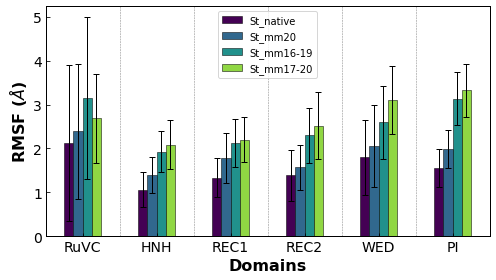

In [34]:
## ROG domain wise

st_rmsf_ruvc = list(pt.rmsf(traj1, mask=':1-36,466-514,679-819', options='byres').T[1])
stmm20_rmsf_ruvc = list(pt.rmsf(traj2, mask=':1-36,466-514,679-819', options='byres').T[1])
stmm16_19_rmsf_ruvc = list(pt.rmsf(traj3, mask=':1-36,466-514,679-819', options='byres').T[1])
stmm17_20_rmsf_ruvc = list(pt.rmsf(traj4, mask=':1-36,466-514,679-819', options='byres').T[1])

st_rmsf_hnh = list(pt.rmsf(traj1, mask=':559-665', options='byres').T[1])
stmm20_rmsf_hnh = list(pt.rmsf(traj2, mask=':559-665', options='byres').T[1])
stmm16_19_rmsf_hnh = list(pt.rmsf(traj3, mask=':559-665', options='byres').T[1])
stmm17_20_rmsf_hnh = list(pt.rmsf(traj4, mask=':559-665', options='byres').T[1])

st_rmsf_rec1= list(pt.rmsf(traj1, mask=':73-167,181-231 ', options='byres').T[1])
stmm20_rmsf_rec1= list(pt.rmsf(traj2, mask=':73-167,181-231 ', options='byres').T[1])
stmm16_19_rmsf_rec1= list(pt.rmsf(traj3, mask=':73-167,181-231 ', options='byres').T[1])
stmm17_20_rmsf_rec1= list(pt.rmsf(traj4, mask=':73-167,181-231 ', options='byres').T[1])

st_rmsf_rec2= list(pt.rmsf(traj1, mask=':232-466', options='byres').T[1])
stmm20_rmsf_rec2= list(pt.rmsf(traj2, mask=':232-466', options='byres').T[1])
stmm16_19_rmsf_rec2= list(pt.rmsf(traj3, mask=':232-466', options='byres').T[1])
stmm17_20_rmsf_rec2= list(pt.rmsf(traj4, mask=':232-466', options='byres').T[1])

# st_rmsf_rec3= list(pt.rmsf(traj1, mask=':459-858', options='byres').T[1])
# stmm20_rmsf_rec3=list( pt.rmsf(traj2, mask=':459-858', options='byres').T[1])
# stmm16_19_rmsf_rec3= list(pt.rmsf(traj3, mask=':459-858', options='byres').T[1])
# stmm17_20_rmsf_rec3= list(pt.rmsf(traj4, mask=':459-858', options='byres').T[1])

st_rmsf_wed= list(pt.rmsf(traj1, mask=':820-963', options='byres').T[1])
stmm20_rmsf_wed= list(pt.rmsf(traj2, mask=':820-963', options='byres').T[1])
stmm16_19_rmsf_wed= list(pt.rmsf(traj3, mask=':820-963', options='byres').T[1])
stmm17_20_rmsf_wed= list(pt.rmsf(traj4, mask=':820-963', options='byres').T[1])

st_rmsf_pi= list(pt.rmsf(traj1, mask=':963-1121', options='byres').T[1])
stmm20_rmsf_pi= list(pt.rmsf(traj2, mask=':963-1121', options='byres').T[1])
stmm16_19_rmsf_pi= list(pt.rmsf(traj3, mask=':963-1121', options='byres').T[1])
stmm17_20_rmsf_pi= list(pt.rmsf(traj4, mask=':963-1121', options='byres').T[1])

data_rmsf_ruvc = pd.DataFrame(zip(st_rmsf_ruvc,stmm20_rmsf_ruvc,stmm16_19_rmsf_ruvc,stmm17_20_rmsf_ruvc), 
columns=['St_native-RuvC','St_mm20-RuvC','St_mm16-19-RuvC','St_mm17-20-RuvC'])
data_rmsf_hnh = pd.DataFrame(zip(st_rmsf_hnh,stmm20_rmsf_hnh,stmm16_19_rmsf_hnh,stmm17_20_rmsf_hnh), columns=['St_native-HNH','St_mm20-HNH','St_mm16-19-HNH','St_mm17-20-HNH'])
data_rmsf_rec1 = pd.DataFrame(zip(st_rmsf_rec1,stmm20_rmsf_rec1,stmm16_19_rmsf_rec1,stmm17_20_rmsf_rec1), columns=['St_native-REC1','St_mm20-REC1','St_mm16-19-REC1','St_mm17-20-REC1'])
data_rmsf_rec2 = pd.DataFrame(zip(st_rmsf_rec2,stmm20_rmsf_rec2,stmm16_19_rmsf_rec2,stmm17_20_rmsf_rec2), columns=['St_native-REC2','St_mm20-REC2','St_mm16-19-REC2','St_mm17-20-REC2'])
#data_rmsf_rec3 = pd.DataFrame(zip(st_rmsf_rec3,stmm20_rmsf_rec3,stmm16_19_rmsf_rec3,stmm17_20_rmsf_rec3), columns=['St_native-REC3','St_mm20-REC3','St_mm16-19-REC3','St_mm17-20-REC3'])
data_rmsf_wed = pd.DataFrame(zip(st_rmsf_wed,stmm20_rmsf_wed,stmm16_19_rmsf_wed,stmm17_20_rmsf_wed), columns=['St_native-WED','St_mm20-WED','St_mm16-19-WED','St_mm17-20-WED'])
data_rmsf_pi = pd.DataFrame(zip(st_rmsf_pi,stmm20_rmsf_pi,stmm16_19_rmsf_pi,stmm17_20_rmsf_pi), columns=['St_native-PI','St_mm20-PI','St_mm16-19-PI','St_mm17-20-PI'])



import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate mean values
mean_ruvc = data_rmsf_ruvc.mean()
mean_hnh = data_rmsf_hnh.mean()
mean_rec1 = data_rmsf_rec1.mean()
mean_rec2 = data_rmsf_rec2.mean()
mean_wed = data_rmsf_wed.mean()
mean_pi = data_rmsf_pi.mean()

# Calculate standard deviation values
std_ruvc = data_rmsf_ruvc.std()
std_hnh = data_rmsf_hnh.std()
std_rec1 = data_rmsf_rec1.std()
std_rec2 = data_rmsf_rec2.std()
std_wed = data_rmsf_wed.std()
std_pi = data_rmsf_pi.std()

# Replace the mean values in the code accordingly
df_mean = pd.DataFrame([
    ['RuVC', mean_ruvc['St_native-RuvC'], mean_ruvc['St_mm20-RuvC'], mean_ruvc['St_mm16-19-RuvC'], mean_ruvc['St_mm17-20-RuvC']],
    ['HNH', mean_hnh['St_native-HNH'], mean_hnh['St_mm20-HNH'], mean_hnh['St_mm16-19-HNH'], mean_hnh['St_mm17-20-HNH']],
    ['REC1', mean_rec1['St_native-REC1'], mean_rec1['St_mm20-REC1'], mean_rec1['St_mm16-19-REC1'], mean_rec1['St_mm17-20-REC1']],
    ['REC2', mean_rec2['St_native-REC2'], mean_rec2['St_mm20-REC2'], mean_rec2['St_mm16-19-REC2'], mean_rec2['St_mm17-20-REC2']],
    ['WED', mean_wed['St_native-WED'], mean_wed['St_mm20-WED'], mean_wed['St_mm16-19-WED'], mean_wed['St_mm17-20-WED']],
    ['PI', mean_pi['St_native-PI'], mean_pi['St_mm20-PI'], mean_pi['St_mm16-19-PI'], mean_pi['St_mm17-20-PI']]
], columns=['Domains', 'St_native', 'St_mm20', 'St_mm16-19','St_mm17-20'])

# Replace the standard deviation values in the code accordingly
df_std = pd.DataFrame([
    ['RuVC', std_ruvc['St_native-RuvC'], std_ruvc['St_mm20-RuvC'], std_ruvc['St_mm16-19-RuvC'], std_ruvc['St_mm17-20-RuvC']],
    ['HNH', std_hnh['St_native-HNH'], std_hnh['St_mm20-HNH'], std_hnh['St_mm16-19-HNH'], std_hnh['St_mm17-20-HNH']],
    ['REC1', std_rec1['St_native-REC1'], std_rec1['St_mm20-REC1'], std_rec1['St_mm16-19-REC1'], std_rec1['St_mm17-20-REC1']],
    ['REC2', std_rec2['St_native-REC2'], std_rec2['St_mm20-REC2'], std_rec2['St_mm16-19-REC2'], std_rec2['St_mm17-20-REC2']],
    ['WED', std_wed['St_native-WED'], std_wed['St_mm20-WED'], std_wed['St_mm16-19-WED'], std_wed['St_mm17-20-WED']],
    ['PI', std_pi['St_native-PI'], std_pi['St_mm20-PI'], std_pi['St_mm16-19-PI'], std_pi['St_mm17-20-PI']]
], columns=['Domains', 'St_native', 'St_mm20', 'St_mm16-19', 'St_mm17-20'])

# Display the updated DataFrame with mean values
print(df_mean)
print(df_std)
  
df_mean.set_index('Domains', inplace=True)
df_std.set_index('Domains', inplace=True)

#color_dict=['#440154','#31688e','#21918c','#90d743']

# Plot grouped bar chart with error bars
ax = df_mean.plot(kind='bar', yerr=df_std, figsize=(7,4),
                  color=color_dict, error_kw={'elinewidth': 1.0, 'capsize': 3}, edgecolor='black', linewidth=0.5, width=0.5)

# Set x-axis label
ax.set_xlabel('Domains', fontsize=16, fontweight='bold')
ax.set_ylabel('RMSF ($\AA$)', fontsize=16, fontweight='bold')

ax = plt.gca()
ax.spines['left'].set_linewidth(1)
ax.spines['bottom'].set_linewidth(1)
ax.spines['top'].set_linewidth(1)
ax.spines['right'].set_linewidth(1)

# Make the x and y ticks point inward
plt.tick_params(axis='x', direction='in')
plt.tick_params(axis='y', direction='in')

plt.xticks(rotation=0, fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize=10)

# Add vertical lines between groups
for i in range(0, len(df_mean)):
    plt.axvline(x=i + 0.5, color='gray', linestyle='--', linewidth=0.5)
plt.tight_layout()
#plt.savefig('FnCas9_all_domain-wise-ROG_stable-part.svg')
plt.show()

In [ ]:
print(data_rmsf_pi.mean(),
data_rmsf_pi.std())

In [ ]:
import pandas as pd # 
data_rmsd_first=pd.DataFrame(list(zip(st_rmsd_first,stmm20_rmsd_first,stmm16_19_rmsd_first,stmm17_20_rmsd_first)), columns=['RMSD_st_native','RMSD_st_mm20','RMSD_st_mm16-19','RMSD_st_mm17-20'])
data_rmsg = pd.DataFrame(list(zip(st_rmsg,stmm20_rmsg,stmm16_19_rmsg,stmm17_20_rmsg)), columns=['ROG_st_native','ROG_st_mm20','ROG_st_mm16-19','ROG_st_mm17-20'])
#data_rmsf=pd.DataFrame(list(zip(st_rmsf.T,stmm20_rmsf.T)), columns=['RMSF_st_native','RMSF_st_mm20'])
data_sec=pd.DataFrame(list(zip(st_sec,stmm20_sec,stmm16_19_sec,stmm17_20_sec)), columns=['Sec_st_native','Sec_st_mm20','Sec_st_mm16-19','Sec_st_mm17-20'])
data_surf=pd.DataFrame(list(zip(st_surf,stmm20_surf,stmm16_19_surf,stmm17_20_surf)), columns=['SASA_st_native','SASA_st_mm20','SASA_st_mm16-19','SASA_st_mm17-20'])
data_prot = pd.DataFrame(list(zip(st_prot,stmm20_prot,stmm16_19_prot,stmm17_20_prot)), columns=['Hbonds_st_native','Hbonds_st_mm20','Hbonds_st_mm16-19','Hbonds_st_mm17-20'])
data_prot.head()

In [53]:
data_surf['SASA_st_mm17-20'] = data_surf['SASA_st_mm17-20'].replace(data_surf['SASA_st_mm17-20'].max(),46000.349601946305)
data_surf['SASA_st_mm17-20'] = data_surf['SASA_st_mm17-20'].replace(data_surf['SASA_st_mm17-20'].min(),46000.349601946305)
data_surf['SASA_st_mm16-19'] = data_surf['SASA_st_mm16-19'].replace([0],45300.349601946305)
data_surf['SASA_st_mm20'] = data_surf['SASA_st_mm20'].replace(data_surf['SASA_st_mm20'].min(),46000.349601946305)
data_surf['SASA_st_native'] = data_surf['SASA_st_native'].replace(data_surf['SASA_st_native'].min(),45301.349601946305)
data_surf.max()

SASA_st_native     46271.710547
SASA_st_mm20       46141.608983
SASA_st_mm16-19    46124.977021
SASA_st_mm17-20    46161.119044
dtype: float64

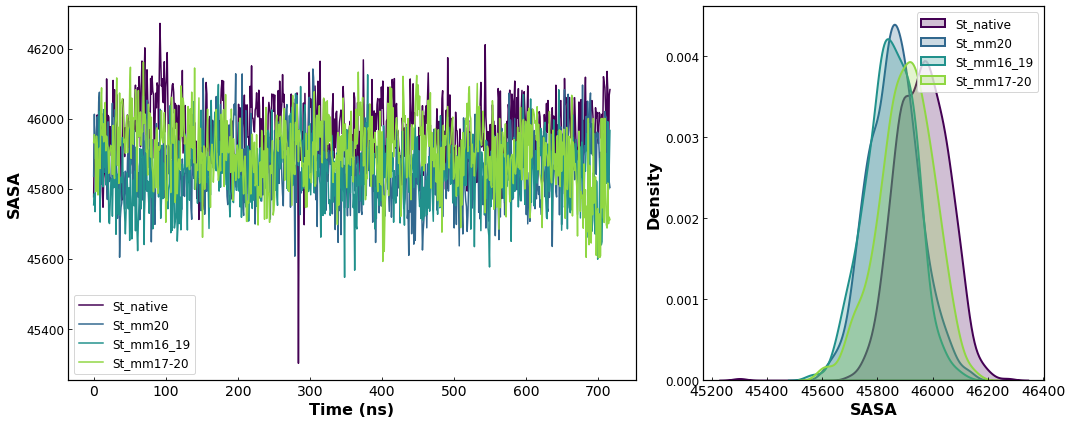

In [54]:
from matplotlib import pyplot as plt
color_dict=['#440154','#31688e','#21918c','#90d743']
#plt.legend(['StCas9-native','StCas9-mm20','StCas9-mm16,19','StCas9-mm17-20'],fontsize=12)
# plt.ylabel('SASA', fontsize=14)
# plt.xlabel('Frames',fontsize=14)
# #plt.title('Backbone after lsq fit to Backbone')
# plt.gcf().set_size_inches(8, 5)
fig = plt.figure(figsize=(15, 6))
gs = fig.add_gridspec(1, 2, width_ratios=[2.5, 1.5])

# Create the RMSD plot
ax1 = fig.add_subplot(gs[0])
data_surf.plot(ax=ax1, color=color_dict)
plt.legend(['St_native', 'St_mm20', 'St_mm16_19', 'St_mm17-20'], fontsize=12)
plt.ylabel('SASA', fontsize=16, fontweight='bold')
plt.xlabel('Time (ns)',fontsize=16, fontweight='bold')
ax1.spines['left'].set_linewidth(1.2)
ax1.spines['bottom'].set_linewidth(1.2)
ax1.spines['top'].set_linewidth(1.2)
ax1.spines['right'].set_linewidth(1.2)
plt.xticks(rotation=0, fontsize=14)
plt.yticks(fontsize=12)
plt.tick_params(axis='x', direction='in')
plt.tick_params(axis='y', direction='in')

# Create the density plot on the right
ax2 = fig.add_subplot(gs[1])
sns.kdeplot(data=data_surf['SASA_st_native'], ax=ax2, color=color_dict[0], label='St_native', fill=True,linewidth=2)
sns.kdeplot(data=data_surf['SASA_st_mm20'], ax=ax2, color=color_dict[1], label='St_mm20', fill=True, linewidth=2)
sns.kdeplot(data=data_surf['SASA_st_mm16-19'], ax=ax2, color=color_dict[2], label='St_mm16_19', fill=True, linewidth=2)
sns.kdeplot(data=data_surf['SASA_st_mm17-20'], ax=ax2, color=color_dict[3], label='St_mm17-20', fill=True, linewidth=2)
plt.xlabel('SASA', fontsize=16, fontweight='bold')
plt.ylabel('Density', fontsize=16, fontweight='bold')
plt.legend(fontsize=12)
ax2.spines['left'].set_linewidth(1.2)
ax2.spines['bottom'].set_linewidth(1.2)
ax2.spines['top'].set_linewidth(1.2)
ax2.spines['right'].set_linewidth(1.2)
plt.xticks(rotation=0, fontsize=14)
plt.yticks(fontsize=12)
plt.tick_params(axis='x', direction='in')
plt.tick_params(axis='y', direction='in')
plt.tight_layout()
plt.savefig('StCas9_all_SASA_with_density-stable-part_subplot.svg')
plt.show()


In [55]:
data_surf.columns=['St_native','St_mm20','St_mm16_19','St_mm17-20']
data_surf_save=data_surf.stack().reset_index().sort_values(by=['level_1'], ascending=False).iloc[:,1:]
data_surf_save.columns=['Label','SASA']
data_surf_save.to_csv('StCas9_all-protein_SASA.csv', index=False)
data_surf_save.head()

,Label,SASA
0,St_native,45776.867968
924,St_native,45895.147959
892,St_native,45961.685820
896,St_native,46024.385117
2268,St_native,45841.320359


In [59]:
data_rmsd_first.columns=['St_native','St_mm20','St_mm16_19','St_mm17-20']
data_rmsd_first_save=data_rmsd_first.stack().reset_index().sort_values(by=['level_1'], ascending=False).iloc[:,1:]
data_rmsd_first_save.columns=['Label','SASA']
data_rmsd_first_save.to_csv('StCas9_all-protein_RMSD.csv', index=False)
data_rmsd_first_save.head()

,Label,SASA
0,St_native,0.000000
924,St_native,2.926891
892,St_native,3.016246
896,St_native,2.644768
2268,St_native,2.788990


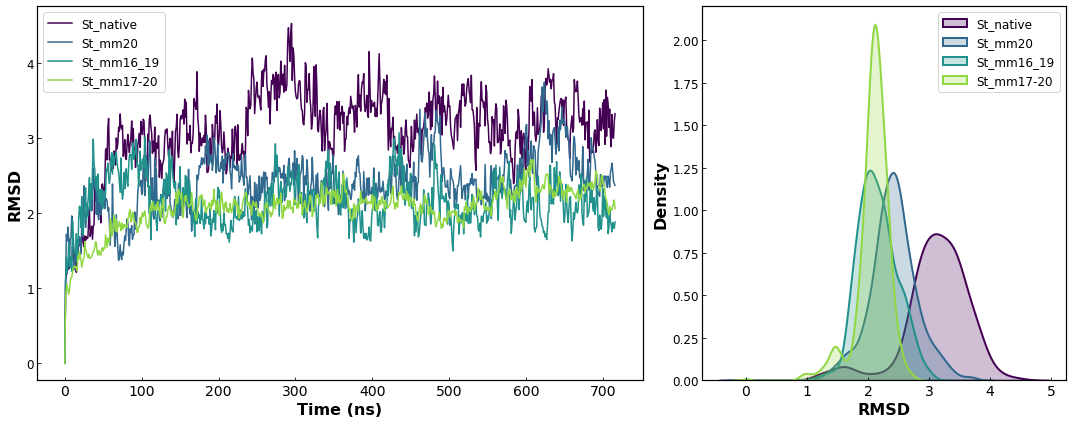

In [56]:
color_dict=['#440154','#31688e','#21918c','#90d743']
fig = plt.figure(figsize=(15, 6))
gs = fig.add_gridspec(1, 2, width_ratios=[2.5, 1.5])

# Create the RMSD plot
ax1 = fig.add_subplot(gs[0])
data_rmsd_first.plot(ax=ax1, color=color_dict)
plt.legend(['St_native', 'St_mm20', 'St_mm16_19', 'St_mm17-20'], fontsize=12)
plt.ylabel('RMSD', fontsize=16, fontweight='bold')
plt.xlabel('Time (ns)',fontsize=16, fontweight='bold')
ax1.spines['left'].set_linewidth(1.2)
ax1.spines['bottom'].set_linewidth(1.2)
ax1.spines['top'].set_linewidth(1.2)
ax1.spines['right'].set_linewidth(1.2)
plt.xticks(rotation=0, fontsize=14)
plt.yticks(fontsize=12)
plt.tick_params(axis='x', direction='in')
plt.tick_params(axis='y', direction='in')

# Create the density plot on the right
ax2 = fig.add_subplot(gs[1])
sns.kdeplot(data=data_rmsd_first['RMSD_st_native'], ax=ax2, color=color_dict[0], label='St_native', fill=True,linewidth=2)
sns.kdeplot(data=data_rmsd_first['RMSD_st_mm20'], ax=ax2, color=color_dict[1], label='St_mm20', fill=True, linewidth=2)
sns.kdeplot(data=data_rmsd_first['RMSD_st_mm16-19'], ax=ax2, color=color_dict[2], label='St_mm16_19', fill=True, linewidth=2)
sns.kdeplot(data=data_rmsd_first['RMSD_st_mm17-20'], ax=ax2, color=color_dict[3], label='St_mm17-20', fill=True, linewidth=2)
plt.xlabel('RMSD', fontsize=16, fontweight='bold')
plt.ylabel('Density', fontsize=16, fontweight='bold')
plt.legend(fontsize=12)
ax2.spines['left'].set_linewidth(1.2)
ax2.spines['bottom'].set_linewidth(1.2)
ax2.spines['top'].set_linewidth(1.2)
ax2.spines['right'].set_linewidth(1.2)
plt.xticks(rotation=0, fontsize=14)
plt.yticks(fontsize=12)
plt.tick_params(axis='x', direction='in')
plt.tick_params(axis='y', direction='in')
plt.tight_layout()
plt.savefig('StCas9_all_RMSD-prot_with_density-stable-part_subplot.svg')
plt.show()

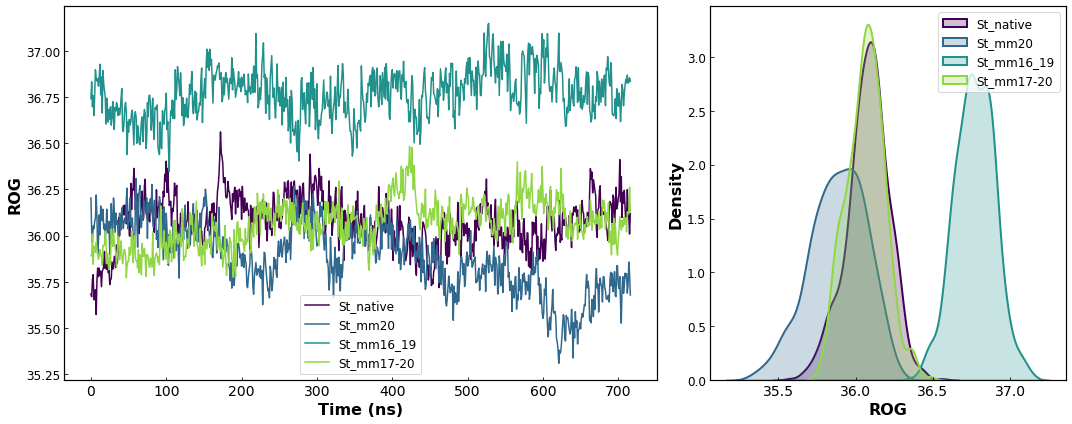

In [57]:
from matplotlib import pyplot as plt
color_dict=['#440154','#31688e','#21918c','#90d743']
#plt.legend(['StCas9-native','StCas9-mm20','StCas9-mm16,19','StCas9-mm17-20'],fontsize=12)
# plt.ylabel('ROG', fontsize=14)
# plt.xlabel('Frames',fontsize=14)
# #plt.title('Backbone after lsq fit to Backbone')
# plt.gcf().set_size_inches(8, 5)
fig = plt.figure(figsize=(15, 6))
gs = fig.add_gridspec(1, 2, width_ratios=[2.5, 1.5])

# Create the RMSD plot
ax1 = fig.add_subplot(gs[0])
data_rg.plot(ax=ax1, color=color_dict)
plt.legend(['St_native', 'St_mm20', 'St_mm16_19', 'St_mm17-20'], fontsize=12)
plt.ylabel('ROG', fontsize=16, fontweight='bold')
plt.xlabel('Time (ns)',fontsize=16, fontweight='bold')
ax1.spines['left'].set_linewidth(1.2)
ax1.spines['bottom'].set_linewidth(1.2)
ax1.spines['top'].set_linewidth(1.2)
ax1.spines['right'].set_linewidth(1.2)
plt.xticks(rotation=0, fontsize=14)
plt.yticks(fontsize=12)
plt.tick_params(axis='x', direction='in')
plt.tick_params(axis='y', direction='in')

# Create the density plot on the right
ax2 = fig.add_subplot(gs[1])
sns.kdeplot(data=data_rg['ROG_st_native'], ax=ax2, color=color_dict[0], label='St_native', fill=True,linewidth=2)
sns.kdeplot(data=data_rg['ROG_st_mm20'], ax=ax2, color=color_dict[1], label='St_mm20', fill=True, linewidth=2)
sns.kdeplot(data=data_rg['ROG_st_mm16-19'], ax=ax2, color=color_dict[2], label='St_mm16_19', fill=True, linewidth=2)
sns.kdeplot(data=data_rg['ROG_st_mm17-20'], ax=ax2, color=color_dict[3], label='St_mm17-20', fill=True, linewidth=2)
plt.xlabel('ROG', fontsize=16, fontweight='bold')
plt.ylabel('Density', fontsize=16, fontweight='bold')
plt.legend(fontsize=12)
ax2.spines['left'].set_linewidth(1.2)
ax2.spines['bottom'].set_linewidth(1.2)
ax2.spines['top'].set_linewidth(1.2)
ax2.spines['right'].set_linewidth(1.2)
plt.xticks(rotation=0, fontsize=14)
plt.yticks(fontsize=12)
plt.tick_params(axis='x', direction='in')
plt.tick_params(axis='y', direction='in')
plt.tight_layout()
plt.savefig('StCas9_all_ROG_with_density-stable-part_subplot.svg')
plt.show()


In [58]:
data_rg.columns=['St_native','St_mm20','St_mm16_19','St_mm17-20']
data_rg_save=data_rg.stack().reset_index().sort_values(by=['level_1'], ascending=False).iloc[:,1:]
data_rg_save.columns=['Label','ROG']
data_rg_save.to_csv('StCas9_all-protein_ROG.csv', index=False)
data_rg_save.head()

,Label,ROG
0,St_native,35.684057
924,St_native,36.119654
892,St_native,35.935293
896,St_native,36.042500
2268,St_native,35.996524


In [ ]:
# st_rmsf=pd.read_csv('/storage3/gayatrip/EMX1-St_native_rep/St_native_300-500ns.csv')
# stmm20_rmsf=pd.read_csv('/storage3/gayatrip/EMX1-St_mm20/repeat/St_mm20_300-500ns.csv')
# stmm16_19_rmsf=pd.read_csv('/storage3/gayatrip/EMX1_St_mm16_19/St_mm16_19_300-500ns.csv')
# stmm17_20_rmsf=pd.read_csv('/storage3/gayatrip/EMX1-St_mm17-20/St_mm17-20_300-500ns.csv')

# data_rmsf=pd.DataFrame()
# data_rmsf['st_RMSF']=st_rmsf
# data_rmsf['stmm20_RMSF']=stmm20_rmsf
# data_rmsf['stmm16-19_RMSF']=stmm16_19_rmsf
# data_rmsf['stmm17-20_RMSF']=stmm17_20_rmsf
# data_rmsf.head()

In [ ]:
data_rmsf.plot(color=color_dict, linewidth=2)
plt.legend(['StCas9-native','StCas9-mm20','StCas9-mm16,19','StCas9-mm17-20'],fontsize=12)
plt.ylabel('RMSF (Angstrom)', fontsize=14)
plt.xlabel('Residue Index',fontsize=14)
plt.gcf().set_size_inches(15, 7)

#D911-b18 Mm-D1027 – 1506

R904-b17 Mm-R1020 -1505

S908-b18 Mm-S1024-1506

In [60]:
# # compute pca for RNA-DNA hybrid
#pt.dssp(traj)
#st_pca=pt.pca(traj1, mask='@C,CA,N,O', n_vecs=2)
st_pca=pt.pca(traj1, mask=':1125-1144,1203-1222', n_vecs=2)
stmm20_pca=pt.pca(traj2, mask=':1125-1144,1203-1222', n_vecs=2)
stmm16_19_pca=pt.pca(traj3, mask=':1125-1144,1203-1222', n_vecs=2)
stmm17_20_pca=pt.pca(traj4, mask=':1125-1144,1203-1222', n_vecs=2)

In [61]:
# # compute pca for HNH HNH=937-1070
#pt.dssp(traj)
#st_pca=pt.pca(traj1, mask='@C,CA,N,O', n_vecs=2)
st_pca_hnh=pt.pca(traj1, mask=':559-665', n_vecs=2)
stmm20_pca_hnh=pt.pca(traj2, mask=':559-665', n_vecs=2)
stmm16_19_pca_hnh=pt.pca(traj3, mask=':559-665', n_vecs=2)
stmm17_20_pca_hnh=pt.pca(traj4, mask=':559-665', n_vecs=2)

In [62]:
# # compute pca for ruvc ruvc=937-1070
#pt.dssp(traj)
#st_pca=pt.pca(traj1, mask='@C,CA,N,O', n_vecs=2)
st_pca_ruvc=pt.pca(traj1, mask=':1-36,466-514,679-819', n_vecs=2)
stmm20_pca_ruvc=pt.pca(traj2, mask=':1-36,466-514,679-819', n_vecs=2)
stmm16_19_pca_ruvc=pt.pca(traj3, mask=':1-36,466-514,679-819', n_vecs=2)
stmm17_20_pca_ruvc=pt.pca(traj4, mask=':1-36,466-514,679-819', n_vecs=2)

In [63]:
# # compute pca for rec3 rec3=937-1070
st_pca_rec1=pt.pca(traj1, mask=':73-167,181-231 ', n_vecs=2)
stmm20_pca_rec1=pt.pca(traj2, mask=':73-167,181-231 ', n_vecs=2)
stmm16_19_pca_rec1=pt.pca(traj3, mask=':73-167,181-231 ', n_vecs=2)
stmm17_20_pca_rec1=pt.pca(traj4, mask=':73-167,181-231 ', n_vecs=2)

In [64]:
# # compute pca for rec2 rec2=232-466
#pt.dssp(traj)
#st_pca=pt.pca(traj1, mask='@C,CA,N,O', n_vecs=2)
st_pca_rec2=pt.pca(traj1, mask=':232-466', n_vecs=2)
stmm20_pca_rec2=pt.pca(traj2, mask=':232-466', n_vecs=2)
stmm16_19_pca_rec2=pt.pca(traj3, mask=':232-466', n_vecs=2)
stmm17_20_pca_rec2=pt.pca(traj4, mask=':232-466', n_vecs=2)

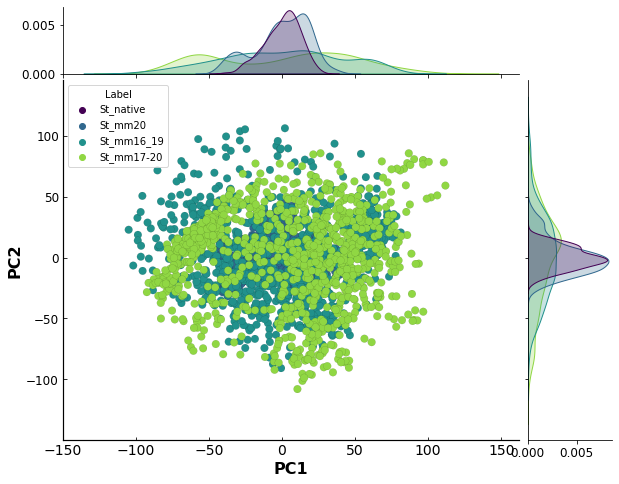

In [65]:
df1 = pd.DataFrame({'PC1': st_pca[0][0], 'PC2': st_pca[0][1]})
df2 = pd.DataFrame({'PC1': stmm20_pca[0][0], 'PC2': stmm20_pca[0][1]})
df3 = pd.DataFrame({'PC1': stmm16_19_pca[0][0], 'PC2': stmm16_19_pca[0][1]})
df4 = pd.DataFrame({'PC1': stmm17_20_pca[0][0], 'PC2': stmm17_20_pca[0][1]})
color_dict=['#440154','#31688e','#21918c','#90d743']

df1['Label']=['St_native']*len(df1)
df2['Label']=['St_mm20']*len(df2)
df3['Label']=['St_mm16_19']*len(df3)
df4['Label']=['St_mm17-20']*len(df4)

pca_dup=pd.concat([df1,df2,df3,df4])
#sns.jointplot(data=pca_dup, x='PC1', y='PC2', kind='scatter', hue='Label', alpha=1, palette=color_dict, edgecolors='black',s=60, linewidths=2)
sns.jointplot(data=pca_dup, x='PC1', y='PC2', kind='scatter', hue='Label',joint_kws = {'ec': 'black', 'linewidth': 0.07, 's':60}, alpha=1, palette=color_dict, 
              space=0.1, ratio=5, marginal_ticks=True, marginal_kws= {'linewidths': 1}, legend=True)


plt.ylabel('PC2', fontsize=16, fontweight='bold')
plt.xlabel('PC1',fontsize=16, fontweight='bold')
ax = plt.gca()
ax.spines['left'].set_linewidth(1.2)
ax.spines['bottom'].set_linewidth(1.2)
ax.spines['top'].set_linewidth(1.2)
ax.spines['right'].set_linewidth(1.2)
plt.xticks(rotation=0, fontsize=14)
plt.yticks(fontsize=12)
# Make the x and y ticks point inward
plt.tick_params(axis='x', direction='in')
plt.tick_params(axis='y', direction='in')
#plt.savefig('figures/StCas9_all_hybrid_pca-with-density.svg')
#plt.title('PCA of SpCas9 Hybrid')
plt.gcf().set_size_inches(9, 7)

#sns.jointplot(data=st_pca[0][0], x="total_bill", y="tip", kind="reg", marker="*")

In [ ]:
# pca_dup.to_csv('St_NA_csvs/St_PCA_PCs_hybrid.csv', index=False)

FileNotFoundError: [Errno 2] No such file or directory: 'figures/StCas9_all_hybrid_pca.svg'

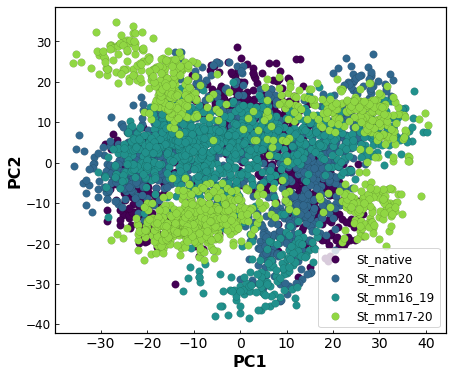

In [66]:
%matplotlib inline
#%config InlineBackend.figure_format = 'retina'  # high resolution
import matplotlib

#projection_data = data[0]
from matplotlib import pyplot as plt

plt.gcf().set_size_inches(7, 6)
plt.scatter(st_pca_hnh[0][0], st_pca_hnh[0][1], marker='o',alpha=1, color='#440154',edgecolors='black',s =60,linewidths=0.08)
plt.scatter(stmm20_pca_hnh[0][0], stmm20_pca_hnh[0][1], marker='o', alpha=1, color='#31688e',edgecolors='black',s =60,linewidths=0.08)
plt.scatter(stmm16_19_pca_hnh[0][0], stmm16_19_pca_hnh[0][1], marker='o', alpha=1, color='#21918c',edgecolors='black',s =60,linewidths=0.08)
plt.scatter(stmm17_20_pca_hnh[0][0], stmm17_20_pca_hnh[0][1], marker='o', alpha=1, color='#90d743',edgecolors='black',s =60,linewidths=0.08)
plt.legend(['St_native','St_mm20','St_mm16_19','St_mm17-20'],fontsize=12)
plt.ylabel('PC2', fontsize=16, fontweight='bold')
plt.xlabel('PC1',fontsize=16, fontweight='bold')
ax = plt.gca()
ax.spines['left'].set_linewidth(1.2)
ax.spines['bottom'].set_linewidth(1.2)
ax.spines['top'].set_linewidth(1.2)
ax.spines['right'].set_linewidth(1.2)
plt.xticks(rotation=0, fontsize=14)
plt.yticks(fontsize=12)
# Make the x and y ticks point inward
plt.tick_params(axis='x', direction='in')
plt.tick_params(axis='y', direction='in')
#plt.savefig('figures/StCas9_all_hybrid_pca.svg')
plt.title('PCA of StCas9 Hybrid')
plt.gcf().set_size_inches(9, 6)

In [ ]:
df1 = pd.DataFrame({'PC1': st_pca_hnh[0][0], 'PC2': st_pca_hnh[0][1]})
df2 = pd.DataFrame({'PC1': stmm20_pca_hnh[0][0], 'PC2': stmm20_pca_hnh[0][1]})
df3 = pd.DataFrame({'PC1': stmm16_19_pca_hnh[0][0], 'PC2': stmm16_19_pca_hnh[0][1]})
df4 = pd.DataFrame({'PC1': stmm17_20_pca_hnh[0][0], 'PC2': stmm17_20_pca_hnh[0][1]})

df1['Label']=['St_native']*len(df1)
df2['Label']=['St_mm20']*len(df2)
df3['Label']=['St_mm16_19']*len(df3)
df4['Label']=['St_mm17-20']*len(df4)

pca_dup=pd.concat([df1,df2,df3,df4])
#sns.jointplot(data=pca_dup, x='PC1', y='PC2', kind='scatter', hue='Label', alpha=1, palette=color_dict, edgecolors='black',s=60, linewidths=2)
sns.jointplot(data=pca_dup, x='PC1', y='PC2', kind='scatter', hue='Label',joint_kws = {'ec': 'black', 'linewidth': 0.07, 's':60}, alpha=1, palette=color_dict, 
              space=0.5, ratio=5, marginal_ticks=True, marginal_kws= {'linewidths': 1}, legend=True)


plt.ylabel('PC2', fontsize=16, fontweight='bold')
plt.xlabel('PC1',fontsize=16, fontweight='bold')
ax = plt.gca()
ax.spines['left'].set_linewidth(1.2)
ax.spines['bottom'].set_linewidth(1.2)
ax.spines['top'].set_linewidth(1.2)
ax.spines['right'].set_linewidth(1.2)
plt.xticks(rotation=0, fontsize=14)
plt.yticks(fontsize=12)
# Make the x and y ticks point inward
plt.tick_params(axis='x', direction='in')
plt.tick_params(axis='y', direction='in')
#plt.savefig('figures/StCas9_all_hybrid_pca_hnh-with-density.svg')
#plt.title('PCA of SpCas9 Hybrid')
plt.gcf().set_size_inches(9, 7)

#sns.jointplot(data=st_pca_hnh[0][0], x="total_bill", y="tip", kind="reg", marker="*")

In [ ]:
df1 = pd.DataFrame({'PC1': st_pca_ruvc[0][0], 'PC2': st_pca_ruvc[0][1]})
df2 = pd.DataFrame({'PC1': stmm20_pca_ruvc[0][0], 'PC2': stmm20_pca_ruvc[0][1]})
df3 = pd.DataFrame({'PC1': stmm16_19_pca_ruvc[0][0], 'PC2': stmm16_19_pca_ruvc[0][1]})
df4 = pd.DataFrame({'PC1': stmm17_20_pca_ruvc[0][0], 'PC2': stmm17_20_pca_ruvc[0][1]})

df1['Label']=['St_native']*len(df1)
df2['Label']=['St_mm20']*len(df2)
df3['Label']=['St_mm16_19']*len(df3)
df4['Label']=['St_mm17-20']*len(df4)

pca_dup=pd.concat([df1,df2,df3,df4])
#sns.jointplot(data=pca_dup, x='PC1', y='PC2', kind='scatter', hue='Label', alpha=1, palette=color_dict, edgecolors='black',s=60, linewidths=2)
sns.jointplot(data=pca_dup, x='PC1', y='PC2', kind='scatter', hue='Label',joint_kws = {'ec': 'black', 'linewidth': 0.07, 's':60}, alpha=1, palette=color_dict, 
              space=0.5, ratio=5, marginal_ticks=True, marginal_kws= {'linewidths': 1}, legend=True)


plt.ylabel('PC2', fontsize=16, fontweight='bold')
plt.xlabel('PC1',fontsize=16, fontweight='bold')
ax = plt.gca()
ax.spines['left'].set_linewidth(1.2)
ax.spines['bottom'].set_linewidth(1.2)
ax.spines['top'].set_linewidth(1.2)
ax.spines['right'].set_linewidth(1.2)
plt.xticks(rotation=0, fontsize=14)
plt.yticks(fontsize=12)
# Make the x and y ticks point inward
plt.tick_params(axis='x', direction='in')
plt.tick_params(axis='y', direction='in')
#plt.savefig('figures/StCas9_all_hybrid_pca_ruvc-with-density.svg')
#plt.title('PCA of SpCas9 Hybrid')
plt.gcf().set_size_inches(9, 7)

#sns.jointplot(data=st_pca_ruvc[0][0], x="total_bill", y="tip", kind="reg", marker="*")

In [ ]:
%matplotlib inline
#%config InlineBackend.figure_format = 'retina'  # high resolution
import matplotlib

#projection_data = data[0]
from matplotlib import pyplot as plt

plt.gcf().set_size_inches(7, 6)
plt.scatter(st_pca_rec1[0][0], st_pca_rec1[0][1], marker='o',alpha=1, color='#440154',edgecolors='black',s =60,linewidths=0.08)
plt.scatter(stmm20_pca_rec1[0][0], stmm20_pca_rec1[0][1], marker='o', alpha=1, color='#31688e',edgecolors='black',s =60,linewidths=0.08)
plt.scatter(stmm16_19_pca_rec1[0][0], stmm16_19_pca_rec1[0][1], marker='o', alpha=1, color='#21918c',edgecolors='black',s =60,linewidths=0.08)
plt.scatter(stmm17_20_pca_rec1[0][0], stmm17_20_pca_rec1[0][1], marker='o', alpha=1, color='#90d743',edgecolors='black',s =60,linewidths=0.08)
plt.legend(['St_native','St_mm20','St_mm16_19','St_mm17-20'],fontsize=12)
plt.ylabel('PC2', fontsize=16, fontweight='bold')
plt.xlabel('PC1',fontsize=16, fontweight='bold')
ax = plt.gca()
ax.spines['left'].set_linewidth(1.2)
ax.spines['bottom'].set_linewidth(1.2)
ax.spines['top'].set_linewidth(1.2)
ax.spines['right'].set_linewidth(1.2)
plt.xticks(rotation=0, fontsize=14)
plt.yticks(fontsize=12)
# Make the x and y ticks point inward
plt.tick_params(axis='x', direction='in')
plt.tick_params(axis='y', direction='in')
#plt.savefig('figures/StCas9_all_rec1_pca.svg')
plt.title('PCA of StCas9 REC1')
plt.gcf().set_size_inches(9, 6)
#cbar = plt.colorbar()

In [ ]:
df1 = pd.DataFrame({'PC1': st_pca_rec1[0][0], 'PC2': st_pca_rec1[0][1]})
df2 = pd.DataFrame({'PC1': stmm20_pca_rec1[0][0], 'PC2': stmm20_pca_rec1[0][1]})
df3 = pd.DataFrame({'PC1': stmm16_19_pca_rec1[0][0], 'PC2': stmm16_19_pca_rec1[0][1]})
df4 = pd.DataFrame({'PC1': stmm17_20_pca_rec1[0][0], 'PC2': stmm17_20_pca_rec1[0][1]})

df1['Label']=['St_native']*len(df1)
df2['Label']=['St_mm20']*len(df2)
df3['Label']=['St_mm16_19']*len(df3)
df4['Label']=['St_mm17-20']*len(df4)

pca_dup=pd.concat([df1,df2,df3,df4])
#sns.jointplot(data=pca_dup, x='PC1', y='PC2', kind='scatter', hue='Label', alpha=1, palette=color_dict, edgecolors='black',s=60, linewidths=2)
sns.jointplot(data=pca_dup, x='PC1', y='PC2', kind='scatter', hue='Label',joint_kws = {'ec': 'black', 'linewidth': 0.07, 's':60}, alpha=1, palette=color_dict, 
              space=0.5, ratio=5, marginal_ticks=True, marginal_kws= {'linewidths': 1}, legend=True)


plt.ylabel('PC2', fontsize=16, fontweight='bold')
plt.xlabel('PC1',fontsize=16, fontweight='bold')
ax = plt.gca()
ax.spines['left'].set_linewidth(1.2)
ax.spines['bottom'].set_linewidth(1.2)
ax.spines['top'].set_linewidth(1.2)
ax.spines['right'].set_linewidth(1.2)
plt.xticks(rotation=0, fontsize=14)
plt.yticks(fontsize=12)
# Make the x and y ticks point inward
plt.tick_params(axis='x', direction='in')
plt.tick_params(axis='y', direction='in')
#plt.savefig('figures/StCas9_all_hybrid_pca_rec1-with-density.svg')
#plt.title('PCA of SpCas9 Hybrid')
plt.gcf().set_size_inches(9, 7)

#sns.jointplot(data=st_pca_rec1[0][0], x="total_bill", y="tip", kind="reg", marker="*")

In [ ]:
pca_dup.to_csv('St_NA_csvs/St_PCA_PCs_REC1.csv', index=False)

In [ ]:
%matplotlib inline
#%config InlineBackend.figure_format = 'retina'  # high resolution
import matplotlib

#projection_data = data[0]
from matplotlib import pyplot as plt

plt.gcf().set_size_inches(7, 6)
plt.scatter(st_pca_rec2[0][0], st_pca_rec2[0][1], marker='o',alpha=1, color='#440154',edgecolors='black',s =60,linewidths=0.08)
plt.scatter(stmm20_pca_rec2[0][0], stmm20_pca_rec2[0][1], marker='o', alpha=1, color='#31688e',edgecolors='black',s =60,linewidths=0.08)
plt.scatter(stmm16_19_pca_rec2[0][0], stmm16_19_pca_rec2[0][1], marker='o', alpha=1, color='#21918c',edgecolors='black',s =60,linewidths=0.08)
plt.scatter(stmm17_20_pca_rec2[0][0], stmm17_20_pca_rec2[0][1], marker='o', alpha=1, color='#90d743',edgecolors='black',s =60,linewidths=0.08)
plt.legend(['St_native','St_mm20','St_mm16_19','St_mm17-20'],fontsize=12)
plt.ylabel('PC2', fontsize=16, fontweight='bold')
plt.xlabel('PC1',fontsize=16, fontweight='bold')
ax = plt.gca()
ax.spines['left'].set_linewidth(1.2)
ax.spines['bottom'].set_linewidth(1.2)
ax.spines['top'].set_linewidth(1.2)
ax.spines['right'].set_linewidth(1.2)
plt.xticks(rotation=0, fontsize=14)
plt.yticks(fontsize=12)
# Make the x and y ticks point inward
plt.tick_params(axis='x', direction='in')
plt.tick_params(axis='y', direction='in')
plt.savefig('figures/StCas9_all_rec2_pca.svg')
plt.title('PCA of StCas9 REC2')
plt.gcf().set_size_inches(9, 6)
#cbar = plt.colorbar()

In [ ]:
df1 = pd.DataFrame({'PC1': st_pca_rec2[0][0], 'PC2': st_pca_rec2[0][1]})
df2 = pd.DataFrame({'PC1': stmm20_pca_rec2[0][0], 'PC2': stmm20_pca_rec2[0][1]})
df3 = pd.DataFrame({'PC1': stmm16_19_pca_rec2[0][0], 'PC2': stmm16_19_pca_rec2[0][1]})
df4 = pd.DataFrame({'PC1': stmm17_20_pca_rec2[0][0], 'PC2': stmm17_20_pca_rec2[0][1]})

df1['Label']=['St_native']*len(df1)
df2['Label']=['St_mm20']*len(df2)
df3['Label']=['St_mm16_19']*len(df3)
df4['Label']=['St_mm17-20']*len(df4)

pca_dup=pd.concat([df1,df2,df3,df4])
#sns.jointplot(data=pca_dup, x='PC1', y='PC2', kind='scatter', hue='Label', alpha=1, palette=color_dict, edgecolors='black',s=60, linewidths=2)
sns.jointplot(data=pca_dup, x='PC1', y='PC2', kind='scatter', hue='Label',joint_kws = {'ec': 'black', 'linewidth': 0.07, 's':60}, alpha=1, palette=color_dict, 
              space=0.5, ratio=5, marginal_ticks=True, marginal_kws= {'linewidths': 1}, legend=True)


plt.ylabel('PC2', fontsize=16, fontweight='bold')
plt.xlabel('PC1',fontsize=16, fontweight='bold')
ax = plt.gca()
ax.spines['left'].set_linewidth(1.2)
ax.spines['bottom'].set_linewidth(1.2)
ax.spines['top'].set_linewidth(1.2)
ax.spines['right'].set_linewidth(1.2)
plt.xticks(rotation=0, fontsize=14)
plt.yticks(fontsize=12)
# Make the x and y ticks point inward
plt.tick_params(axis='x', direction='in')
plt.tick_params(axis='y', direction='in')
#plt.savefig('figures/StCas9_all_hybrid_pca_rec2-with-density.svg')
#plt.title('PCA of SpCas9 Hybrid')
plt.gcf().set_size_inches(7, 7)

#sns.jointplot(data=st_pca_rec2[0][0], x="total_bill", y="tip", kind="reg", marker="*")

In [ ]:
pca_dup.to_csv('St_NA_csvs/St_PCA_PCs_REC2.csv', index=False)

In [ ]:
nat_nuc_pc1=st_pca_ruvc[0][0]+ st_pca_hnh[0][0] 
mm20_nuc_pc1=stmm20_pca_ruvc[0][0]+ stmm20_pca_hnh[0][0]
mm16_19_nuc_pc1=stmm16_19_pca_ruvc[0][0]+ stmm16_19_pca_hnh[0][0]
mm17_20_nuc_pc1=stmm17_20_pca_ruvc[0][0]+ stmm17_20_pca_hnh[0][0]

In [ ]:
nat_nuc_pc2=st_pca_ruvc[0][1]+ st_pca_hnh[0][1] 
mm20_nuc_pc2=stmm20_pca_ruvc[0][1]+ stmm20_pca_hnh[0][1]
mm16_19_nuc_pc2=stmm16_19_pca_ruvc[0][1]+ stmm16_19_pca_hnh[0][1]
mm17_20_nuc_pc2=stmm17_20_pca_ruvc[0][1]+ stmm17_20_pca_hnh[0][1]

In [ ]:
df1 = pd.DataFrame({'PC1': nat_nuc_pc1, 'PC2': nat_nuc_pc2})
df2 = pd.DataFrame({'PC1': mm20_nuc_pc1, 'PC2': mm20_nuc_pc2})
df3 = pd.DataFrame({'PC1': mm16_19_nuc_pc1, 'PC2': mm16_19_nuc_pc2})
df4 = pd.DataFrame({'PC1': mm17_20_nuc_pc1, 'PC2': mm17_20_nuc_pc2})

df1['Label']=['St_native']*len(df1)
df2['Label']=['St_mm20']*len(df2)
df3['Label']=['St_mm16_19']*len(df3)
df4['Label']=['St_mm17-20']*len(df4)

pca_dup=pd.concat([df1,df2,df3,df4])
#sns.jointplot(data=pca_dup, x='PC1', y='PC2', kind='scatter', hue='Label', alpha=1, palette=color_dict, edgecolors='black',s=60, linewidths=2)
sns.jointplot(data=pca_dup, x='PC1', y='PC2', kind='scatter', hue='Label',joint_kws = {'ec': 'black', 'linewidth': 0.07, 's':60}, alpha=1, palette=color_dict, 
              space=0.3, ratio=4, marginal_ticks=True, marginal_kws= {'linewidths': 1}, legend=True)


plt.ylabel('PC2', fontsize=16, fontweight='bold')
plt.xlabel('PC1',fontsize=16, fontweight='bold')
ax = plt.gca()
ax.spines['left'].set_linewidth(1.2)
ax.spines['bottom'].set_linewidth(1.2)
ax.spines['top'].set_linewidth(1.2)
ax.spines['right'].set_linewidth(1.2)
plt.xticks(rotation=0, fontsize=14)
plt.yticks(fontsize=12)
# Make the x and y ticks point inward
plt.tick_params(axis='x', direction='in')
plt.tick_params(axis='y', direction='in')
plt.savefig('figures/StCas9_all_hybrid_pca_nuc-lobe-with-density.svg')
#plt.title('PCA of SpCas9 Hybrid')
plt.gcf().set_size_inches(7, 7)

#sns.jointplot(data=st_pca_nuc2[0][0], x="total_bill", y="tip", kind="reg", marker="*")

In [ ]:
nat_rec_pc1=st_pca_rec1[0][0]+ st_pca_rec2[0][0] + st_pca_rec3[0][0]
mm20_rec_pc1=stmm20_pca_rec1[0][0]+ stmm20_pca_rec2[0][0] + stmm20_pca_rec3[0][0]
mm16_19_rec_pc1=stmm16_19_pca_rec1[0][0]+ stmm16_19_pca_rec2[0][0] + stmm16_19_pca_rec3[0][0]
mm17_20_rec_pc1=stmm17_20_pca_rec1[0][0]+ stmm17_20_pca_rec2[0][0] + stmm17_20_pca_rec3[0][0]

In [ ]:
nat_rec_pc2=st_pca_rec1[0][1]+ st_pca_rec2[0][1] + st_pca_rec3[0][1]
mm20_rec_pc2=stmm20_pca_rec1[0][1]+ stmm20_pca_rec2[0][1] + stmm20_pca_rec3[0][1]
mm16_19_rec_pc2=stmm16_19_pca_rec1[0][1]+ stmm16_19_pca_rec2[0][1] + stmm16_19_pca_rec3[0][1]
mm17_20_rec_pc2=stmm17_20_pca_rec1[0][1]+ stmm17_20_pca_rec2[0][1] + stmm17_20_pca_rec3[0][1]

In [ ]:
df1 = pd.DataFrame({'PC1': nat_rec_pc1, 'PC2': nat_rec_pc2})
df2 = pd.DataFrame({'PC1': mm20_rec_pc1, 'PC2': mm20_rec_pc2})
df3 = pd.DataFrame({'PC1': mm16_19_rec_pc1, 'PC2': mm16_19_rec_pc2})
df4 = pd.DataFrame({'PC1': mm17_20_rec_pc1, 'PC2': mm17_20_rec_pc2})

df1['Label']=['St_native']*len(df1)
df2['Label']=['St_mm20']*len(df2)
df3['Label']=['St_mm16_19']*len(df3)
df4['Label']=['St_mm17-20']*len(df4)

pca_dup=pd.concat([df1,df2,df3,df4])
#sns.jointplot(data=pca_dup, x='PC1', y='PC2', kind='scatter', hue='Label', alpha=1, palette=color_dict, edgecolors='black',s=60, linewidths=2)
sns.jointplot(data=pca_dup, x='PC1', y='PC2', kind='scatter', hue='Label',joint_kws = {'ec': 'black', 'linewidth': 0.07, 's':60}, alpha=1, palette=color_dict, 
              space=0.3, ratio=4, marginal_ticks=True, marginal_kws= {'linewidths': 1}, legend=True)


plt.ylabel('PC2', fontsize=16, fontweight='bold')
plt.xlabel('PC1',fontsize=16, fontweight='bold')
ax = plt.gca()
ax.spines['left'].set_linewidth(1.2)
ax.spines['bottom'].set_linewidth(1.2)
ax.spines['top'].set_linewidth(1.2)
ax.spines['right'].set_linewidth(1.2)
plt.xticks(rotation=0, fontsize=14)
plt.yticks(fontsize=12)
# Make the x and y ticks point inward
plt.tick_params(axis='x', direction='in')
plt.tick_params(axis='y', direction='in')
plt.savefig('figures/StCas9_all_hybrid_pca_rec-lobe-with-density.svg')
#plt.title('PCA of SpCas9 Hybrid')
plt.gcf().set_size_inches(7, 7)

#sns.jointplot(data=st_pca_rec2[0][0], x="total_bill", y="tip", kind="reg", marker="*")

In [ ]:
print(traj3, traj2)

In [ ]:
%matplotlib inline
#%config InlineBackend.figure_format = 'retina'  # high resolution
import matplotlib

#projection_data = data[0]
from matplotlib import pyplot as plt

plt.gcf().set_size_inches(7, 6)
plt.scatter(st_pca[0][0], st_pca[0][1], marker='o',alpha=1, color='#440154',edgecolors='black',s =60,linewidths=0.08)
plt.scatter(stmm20_pca[0][0], stmm20_pca[0][1], marker='o', alpha=1, color='#31688e',edgecolors='black',s =60,linewidths=0.08)
plt.scatter(stmm16_19_pca[0][0], stmm16_19_pca[0][1], marker='o', alpha=1, color='#21918c',edgecolors='black',s =60,linewidths=0.08)
plt.scatter(stmm17_20_pca[0][0], stmm17_20_pca[0][1], marker='o', alpha=1, color='#90d743',edgecolors='black',s =60,linewidths=0.08)
#plt.scatter(spmm20_pca[0][0], spmm20_pca[0][1], marker='o', c=range(traj2.n_frames), alpha=1, cmap='cool')
plt.ylabel('PC1', fontsize=14)
plt.xlabel('PC2',fontsize=14)
plt.rc('xtick',labelsize=12)
plt.rc('ytick',labelsize=12)
plt.legend(['St_native','St_mm20','St_mm16_19','St_mm17-20'], fontsize=12,loc="lower right")
#plt.savefig('figures/StCas9_PCA.svg')
plt.show()
#cbar = plt.colorbar()
#cbar.set_label('frame #')

In [ ]:
plt.scatter(st_pca[0][0], st_pca[0][1], marker='o', c=range(traj1.n_frames), alpha=1, cmap='winter')
plt.ylabel('PC1', fontsize=14)
plt.xlabel('PC2',fontsize=14)
plt.gcf().set_size_inches(10, 6)
cbar = plt.colorbar()
cbar.set_label('frame #')

In [ ]:
plt.scatter(stmm20_pca[0][0], stmm20_pca[0][1], marker='o', c=range(traj2.n_frames), alpha=1, cmap='winter')
plt.ylabel('PC1', fontsize=14)
plt.xlabel('PC2',fontsize=14)
plt.gcf().set_size_inches(10, 6)
cbar = plt.colorbar()
cbar.set_label('frame #')

In [ ]:
plt.scatter(stmm16_19_pca[0][0], stmm16_19_pca[0][1], marker='o', c=range(traj3.n_frames), alpha=1, cmap='winter')
plt.ylabel('PC1', fontsize=14)
plt.xlabel('PC2',fontsize=14)
plt.gcf().set_size_inches(10, 6)
cbar = plt.colorbar()
cbar.set_label('frame #')

In [ ]:
plt.scatter(stmm17_20_pca[0][0], stmm17_20_pca[0][1], marker='o', c=range(traj3.n_frames), alpha=1, cmap='winter')
plt.ylabel('PC1', fontsize=14)
plt.xlabel('PC2',fontsize=14)
plt.gcf().set_size_inches(10, 6)
cbar = plt.colorbar()
cbar.set_label('frame #')

sgRNA= 1624-1642
tDNA=1727-1745
ntDNA=1747-1765
HNH=937-1070
RuvC=1-51; 859-899; 1088-1224
REC3=459-858

In [ ]:
#native contacts between RuvC and ntDNA
st_ruv_nt = pt.native_contacts(traj1, mask=':1747-1765 ', mask2=':1-51,859-899,1088-1224', distance=4.0, ref=st_traj[1000])
stmm20_ruv_nt = pt.native_contacts(traj2, mask=':1747-1765 ', mask2=':1-51,859-899,1088-1224', distance=4.0, ref=stmm20_traj[1000])
stmm16_19_ruv_nt = pt.native_contacts(traj3, mask=':1747-1765 ', mask2=':1-51,859-899,1088-1224', distance=4.0, ref=stmm16_19_traj[1000])
stmm17_20_ruv_nt = pt.native_contacts(traj4, mask=':1747-1765 ', mask2=':1-51,859-899,1088-1224', distance=4.0, ref=stmm17_20_traj[1000])
type(stmm20_ruv_nt[0])
# nat_ruv_nt = pd.DataFrame()
# natr=list(nat_ruv_nt[0])

In [ ]:
#native contacts between HNH and tDNA
st_hnh_t = pt.native_contacts(traj1, mask=':1717-1764', mask2=':937-1070',  distance=4.0, ref=st_traj[1000])
stmm20_hnh_t = pt.native_contacts(traj2, mask=':1717-1764', mask2=':937-1070',  distance=4.0, ref=stmm20_traj[1000])
stmm16_19_hnh_t = pt.native_contacts(traj3, mask=':1717-1764', mask2=':937-1070', distance=4.0, ref=stmm16_19_traj[1000])
stmm17_20_hnh_t = pt.native_contacts(traj4, mask=':1717-1764', mask2=':937-1070', distance=4.0, ref=stmm17_20_traj[1000])
#nath=list(nat_hnh_t[0])

In [ ]:
#native contacts between tDNA and ntDNA
st_nt_t = pt.native_contacts(traj1, mask=':1716-1725', mask2=':1756-1764', distance=4.0, ref=st_traj[1000])
stmm20_nt_t = pt.native_contacts(traj2, mask=':1716-1725', mask2=':1756-1764', distance=4.0, ref=stmm20_traj[1000])
stmm16_19_nt_t = pt.native_contacts(traj3, mask=':1716-1725 ', mask2=':1756-1764', distance=4.0, ref=stmm16_19_traj[1000])
stmm17_20_nt_t = pt.native_contacts(traj4, mask=':1716-1725 ', mask2=':1756-1764',distance=4.0, ref=stmm17_20_traj[1000])
#natt=list(nat_nt_t[0])

In [ ]:
#native contacts between sgRNA and tDNA
st_rna_tdna = pt.native_contacts(traj1, mask=':1624-1642', mask2=':1727-1745', distance=4.0, ref=st_traj[1000])
stmm20_rna_tdna = pt.native_contacts(traj2, mask=':1624-1642 ', mask2=':1727-1745',  distance=4.0, ref=stmm20_traj[1000])
stmm16_19_rna_tdna = pt.native_contacts(traj3, mask=':1624-1642 ', mask2=':1727-1745',  distance=4.0, ref=stmm16_19_traj[1000])
stmm17_20_rna_tdna = pt.native_contacts(traj4, mask=':1624-1642 ', mask2=':1727-1745', distance=4.0, ref=stmm17_20_traj[1000])
#natrd=list(nat_rna_tdna[0])

In [ ]:
# #native contacts between RNA-DNA and L2 loop
# sp_l2_t=pt.native_contacts(traj1, mask=':1624-1642,1727-1745', mask2=':1021-1031', ref=0, distance=4.0)
# spmm20_l2_t=pt.native_contacts(traj2, mask=':1624-1642,1727-1745', mask2=':1021-1031', ref=0, distance=4.0)
# spmm17_20_l2_t=pt.native_contacts(traj3, mask=':1624-1642,1727-1745', mask2=':1021-1031', ref=0, distance=4.0)
# #natl2=list(nat_l2_t[0])

In [ ]:
#native contacts between RNA-DNA and REC3
st_rec3=pt.native_contacts(traj1, mask=':1624-1642,1727-1745', mask2=':459-858', distance=4.0, ref=st_traj[1000])
stmm20_rec3=pt.native_contacts(traj2, mask=':1624-1642,1727-1745', mask2=':459-858',  distance=4.0, ref=stmm20_traj[1000])
stmm16_19_rec3=pt.native_contacts(traj3, mask=':1624-1642,1727-1745', mask2=':459-858', distance=4.0, ref=stmm16_19_traj[1000])
stmm17_20_rec3=pt.native_contacts(traj4, mask=':1624-1642,1727-1745', mask2=':459-858', distance=4.0, ref=stmm17_20_traj[1000])
#nat_rec=list(nat_rec3[0])

In [ ]:
#native contacts between RNA-DNA and REC2
st_rec2=pt.native_contacts(traj1, mask=':1624-1642,1727-1745', mask2=':232-466', distance=4.0, ref=st_traj[1000])
stmm20_rec2=pt.native_contacts(traj2, mask=':1624-1642,1727-1745', mask2=':232-466',  distance=4.0, ref=stmm20_traj[1000])
stmm16_19_rec2=pt.native_contacts(traj3, mask=':1624-1642,1727-1745', mask2=':232-466', distance=4.0, ref=stmm16_19_traj[1000])
stmm17_20_rec2=pt.native_contacts(traj4, mask=':1624-1642,1727-1745', mask2=':232-466',  distance=4.0, ref=stmm17_20_traj[1000])
#nat_rec=list(nat_rec3[0])

In [ ]:
#native contacts between RNA-DNA and rec3
st_rec3=pt.native_contacts(traj1, mask=':1624-1642,1727-1745', mask2=':73-167,181-231 ', distance=4.0, ref=st_traj[1000])
stmm20_rec3=pt.native_contacts(traj2, mask=':1624-1642,1727-1745', mask2=':73-167,181-231 ',  distance=4.0, ref=stmm20_traj[1000])
stmm16_19_rec3=pt.native_contacts(traj3, mask=':1624-1642,1727-1745', mask2=':73-167,181-231 ', distance=4.0, ref=stmm16_19_traj[1000])
stmm17_20_rec3=pt.native_contacts(traj4, mask=':1624-1642,1727-1745', mask2=':73-167,181-231 ', distance=4.0, ref=stmm17_20_traj[1000])
#nat_rec=list(nat_rec3[0])

In [ ]:
#native contacts between RNA-DNA and RuvC
st_ruvc=pt.native_contacts(traj1, mask=':1624-1642,1727-1745', mask2=':1-51,859-899,1088-1224',distance=4.0, ref=st_traj[1000])
stmm20_ruvc=pt.native_contacts(traj2, mask=':1624-1642,1727-1745', mask2=':1-51,859-899,1088-1224',distance=4.0, ref=stmm20_traj[1000])
stmm16_19_ruvc=pt.native_contacts(traj3, mask=':1624-1642,1727-1745', mask2=':1-51,859-899,1088-1224',distance=4.0, ref=stmm16_19_traj[1000])
stmm17_20_ruvc=pt.native_contacts(traj4, mask=':1624-1642,1727-1745', mask2=':1-51,859-899,1088-1224', distance=4.0, ref=stmm17_20_traj[1000])
#nat_rec=list(nat_rec3[0])

In [ ]:
#native contacts between RNA-DNA and HNH
st_hnh=pt.native_contacts(traj1, mask=':1624-1642,1727-1745', mask2=':937-1070', distance=4.0, ref=st_traj[1000])
stmm20_hnh=pt.native_contacts(traj2, mask=':1624-1642,1727-1745', mask2=':937-1070',distance=4.0, ref=stmm20_traj[1000])
stmm16_19_hnh=pt.native_contacts(traj3, mask=':1624-1642,1727-1745', mask2=':937-1070', distance=4.0, ref=stmm16_19_traj[1000])
stmm17_20_hnh=pt.native_contacts(traj4, mask=':1624-1642,1727-1745', mask2=':937-1070', distance=4.0, ref=stmm17_20_traj[1000])
#nat_rec=list(nat_rec3[0])

In [ ]:
# #native contacts between RNA-DNA and L1 loop
# sp_l1_t=pt.native_contacts(traj1, mask=':1624-1642,1727-1745', mask2=':881-894', ref=0, distance=4.0)
# spmm20_l1_t=pt.native_contacts(traj2, mask=':1624-1642,1727-1745', mask2=':881-894', ref=0, distance=4.0)
# spmm17_20_l1_t=pt.native_contacts(traj3, mask=':1624-1642,1727-1745', mask2=':881-894', ref=0, distance=4.0)
# #natl1=list(nat_l1_t[0])

In [ ]:
import pandas as pd
nat_sp=pd.DataFrame(list(zip(list(st_ruv_nt[0]),list(st_hnh_t[0]),list(st_nt_t[0]),list(st_rna_tdna[0]),list(st_rec3[0]),list(st_ruvc[0]),list(st_hnh[0]))), columns=['st_RuvC-ntDNA','st_HNH-tDNA','st_ntDNA-tDNA','st_sgRNA-tDNA','st_REC3-RNA_DNA','st_RuvC-RNA_DNA','st_HNH-RNA_DNA'])

In [ ]:
#awk '{print $2}' dist_rec3loop_tdna.agr > dist_rec3loop_tdna.csv
import pandas as pd
nat_fn=pd.DataFrame(list(zip(list(st_ruv_nt[0]),list(st_hnh_t[0]),list(st_nt_t[0]),list(st_rna_tdna[0]),list(st_rec3[0]),list(st_rec2[0]),list(st_rec3[0]),list(st_ruvc[0]),list(st_hnh[0]))), columns=['st_RuvC-ntDNA','st_HNH-tDNA','st_ntDNA-tDNA','st_sgRNA-tDNA','st_REC3-RNA_DNA','st_REC2-RNA_DNA','st_rec3-RNA_DNA','st_RuvC-RNA_DNA','st_HNH-RNA_DNA'])
nat_stmm20=pd.DataFrame(list(zip(list(stmm20_ruv_nt[0]),list(stmm20_hnh_t[0]),list(stmm20_nt_t[0]),list(stmm20_rna_tdna[0]),list(stmm20_rec3[0]),list(stmm20_rec2[0]),list(stmm20_rec3[0]),list(stmm20_ruvc[0]),list(stmm20_hnh[0]))), columns=['stmm20_RuvC-ntDNA','stmm20_HNH-tDNA','stmm20_ntDNA-tDNA','stmm20_sgRNA-tDNA','stmm20_REC3-RNA_DNA','stmm20_REC2-RNA_DNA','stmm20_rec3-RNA_DNA','stmm20_RuvC-RNA_DNA','stmm20_HNH-RNA_DNA'])
nat_stmm16_19=pd.DataFrame(list(zip(list(stmm16_19_ruv_nt[0]),list(stmm16_19_hnh_t[0]),list(stmm16_19_nt_t[0]),list(stmm16_19_rna_tdna[0]),list(stmm16_19_rec3[0]),list(stmm16_19_rec2[0]),list(stmm16_19_rec3[0]),list(stmm16_19_ruvc[0]),list(stmm16_19_hnh[0]))), columns=['stmm16_19_RuvC-ntDNA','stmm16_19_HNH-tDNA','stmm16_19_ntDNA-tDNA','stmm16_19_sgRNA-tDNA','stmm16_19_REC3-RNA_DNA','stmm16_19_REC2-RNA_DNA','stmm16_19_rec3-RNA_DNA','stmm16_19_RuvC-RNA_DNA','stmm16_19_HNH-RNA_DNA'])
nat_stmm17_20=pd.DataFrame(list(zip(list(stmm17_20_ruv_nt[0]),list(stmm17_20_hnh_t[0]),list(stmm17_20_nt_t[0]),list(stmm17_20_rna_tdna[0]),list(stmm17_20_rec3[0]),list(stmm17_20_rec2[0]),list(stmm17_20_rec3[0]),list(stmm17_20_ruvc[0]),list(stmm17_20_hnh[0]))),columns=['stmm17-20_RuvC-ntDNA','stmm17-20_HNH-tDNA','stmm17-20_ntDNA-tDNA','stmm17-20_sgRNA-tDNA','stmm17-20_REC3-RNA_DNA','stmm17-20_REC2-RNA_DNA','stmm17-20_rec3-RNA_DNA','stmm17-20_RuvC-RNA_DNA','stmm17-20_HNH-RNA_DNA'])                    

In [ ]:
nat_fn.to_csv('native_contacts_st_nat_ref10ns.csv', index=False)
nat_stmm20.to_csv('native_contacts_st_mm20_ref10ns.csv', index=False)
nat_stmm16_19.to_csv('native_contacts_st_mm16-19_ref10ns.csv', index=False)
nat_stmm17_20.to_csv('native_contacts_st_mm17-20_ref10ns.csv', index=False)

In [ ]:
import pandas as pd

nat_fn=pd.read_csv('native_contacts_st_nat_ref10ns.csv')
nat_stmm20=pd.read_csv('native_contacts_st_mm20_ref10ns.csv')
nat_stmm16_19=pd.read_csv('native_contacts_st_mm16-19_ref10ns.csv')
nat_stmm17_20=pd.read_csv('native_contacts_st_mm17-20_ref10ns.csv')

In [ ]:
nat_stmm20.head()

In [ ]:
#print(nat_sp.columns, nat_spmm20.columns)
native=pd.concat([nat_fn,nat_stmm20,nat_stmm16_19,nat_stmm17_20], axis=1)
native.columns

In [ ]:
native['stmm20_RuvC-ntDNA']=native['stmm20_RuvC-ntDNA'].replace(304,50)
color_dict=['#563761','#A7425C','#F3825F','#FFE26F']
native[['st_RuvC-ntDNA','stmm20_RuvC-ntDNA','stmm16_19_RuvC-ntDNA','stmm17-20_RuvC-ntDNA']].plot(color=color_dict)
plt.legend(['StCas9-native','StCas9-mm20','StCas9-mm16-19','StCas9-mm17-20'],fontsize=12)
plt.ylabel('Native Contacts b/w RuvC and ntDNA', fontsize=14)
plt.xlabel('Frames',fontsize=14)
plt.gcf().set_size_inches(10, 6)
# distance between these increase in mm17-20 (interactions dec)

In [ ]:
sns.boxplot(data=native[['st_RuvC-ntDNA','stmm20_RuvC-ntDNA','stmm16_19_RuvC-ntDNA','stmm17-20_RuvC-ntDNA']],palette="viridis",linewidth=0.5,orient="h")

In [ ]:
native[['st_HNH-tDNA','stmm20_HNH-tDNA','stmm16_19_HNH-tDNA','stmm17-20_HNH-tDNA']].plot(color=color_dict)
plt.legend(['StCas9-native','StCas9-mm20','StCas9-mm16-19','StCas9-mm17-20'],fontsize=12)
plt.ylabel('Native Contacts b/w HNH and tDNA', fontsize=14)
plt.xlabel('Frames',fontsize=14)
plt.gcf().set_size_inches(10, 6)
# distance between these increase in mm17-20 (interactions dec)

In [ ]:
sns.boxplot(data=native[['st_HNH-tDNA','stmm20_HNH-tDNA','stmm16_19_HNH-tDNA','stmm17-20_HNH-tDNA']],palette="viridis",linewidth=0.5,orient="h")

In [ ]:
native[['st_ntDNA-tDNA','stmm20_ntDNA-tDNA','stmm16_19_ntDNA-tDNA','stmm17-20_ntDNA-tDNA']].plot(color=color_dict)
plt.legend(['StCas9-native','StCas9-mm20','StCas9-mm16-19','StCas9-mm17-20'],fontsize=12)
plt.ylabel('Native Contacts b/w ntDNA and tDNA', fontsize=14)
plt.xlabel('Frames',fontsize=14)
plt.gcf().set_size_inches(10, 6)
# distance between these increase in mm17-20 (interactions dec)

In [ ]:
ax=sns.boxplot(data=native[['st_ntDNA-tDNA','stmm20_ntDNA-tDNA','stmm16_19_ntDNA-tDNA','stmm17-20_ntDNA-tDNA']],palette="viridis",linewidth=0.5,orient="h")
plt.xlabel('No. of Native Contacts ', fontsize=16, fontweight='bold')
plt.ylabel('System', fontsize=16, fontweight='bold')
#plt.legend(fontsize=12)
ax.spines['left'].set_linewidth(1.2)
ax.spines['bottom'].set_linewidth(1.2)
ax.spines['top'].set_linewidth(1.2)
ax.spines['right'].set_linewidth(1.2)
plt.xticks(rotation=0, fontsize=14)
plt.yticks(fontsize=14)
plt.tick_params(axis='x', direction='in')
plt.tick_params(axis='y', direction='in')
plt.gcf().set_size_inches(6, 6)
plt.savefig('figures/St_all_stable-part_ntdna-tdna-conts-boxplot.svg')
plt.show()

In [ ]:
native[['st_sgRNA-tDNA','stmm20_sgRNA-tDNA','stmm16_19_sgRNA-tDNA','stmm17-20_sgRNA-tDNA']].plot(color=color_dict)
plt.legend(['St_native','St_mm20','St_mm16-19','St_mm17-20'],fontsize=14)
plt.ylabel('Native Contacts b/w sgRNA and tDNA', fontsize=16)
plt.xlabel('Frames',fontsize=16)
plt.gcf().set_size_inches(9, 5)
plt.rc('xtick',labelsize=14)
plt.rc('ytick',labelsize=14)
# distance between these increase in mm17-20 (interactions dec)

In [ ]:
sns.boxplot(data=native[['st_sgRNA-tDNA','stmm20_sgRNA-tDNA','stmm16_19_sgRNA-tDNA','stmm17-20_sgRNA-tDNA']],palette="viridis",linewidth=0.5,orient="h")
plt.xlabel('No. of Native Contacts ', fontsize=16, fontweight='bold')
plt.ylabel('System', fontsize=16, fontweight='bold')
#plt.legend(fontsize=12)
ax.spines['left'].set_linewidth(1.2)
ax.spines['bottom'].set_linewidth(1.2)
ax.spines['top'].set_linewidth(1.2)
ax.spines['right'].set_linewidth(1.2)
plt.xticks(rotation=0, fontsize=14)
plt.yticks(fontsize=14)
plt.tick_params(axis='x', direction='in')
plt.tick_params(axis='y', direction='in')
plt.gcf().set_size_inches(6, 6)
plt.savefig('figures/St_all_stable-part_sgrna-tdna-conts-boxplot.svg')
plt.show()

In [ ]:
colors=['#440154','#31688e','#21918c','#90d743']
st_cont=native[['st_sgRNA-tDNA','stmm20_sgRNA-tDNA','stmm16_19_sgRNA-tDNA','stmm17-20_sgRNA-tDNA']]
st_cont_save=st_cont.stack().reset_index().sort_values(by=['level_1'], ascending=False).iloc[:,1:]
st_cont_save.columns=['Label','Angle']
#st_cont_save.head()


st_cont.columns=['St_native','St_mm20','St_mm16_19','St_mm17-20']
#sp_st_angle.plot()
#ax1=sns.boxplot(data=[sp_st_angle['Sp-mm16_19'],sp_st_angle['Sp-mm17-20'],sp_st_angle['St_mm16_19'],sp_st_angle['St_mm17-20']], palette="plasma",linewidth=0.5)
ax1=sns.violinplot(data=st_cont,palette="viridis",linewidth=0.5)
plt.xticks(rotation=15)
#ax1.set_xticklabels(['Sp_mm16,19','Sp_mm17-20','St_mm16,19','St_mm17-20'])
#ax1.set_ylabel('Angle b/w sgRNA-tDNA & tDNA-ntDNA duplex')
plt.xlabel('Systems',fontsize=14)
#plt.savefig('../figures/SpCas9_all_lie_angle.svg'
plt.ylabel('Native Contacts b/w sgRNA-tDNA', fontsize=14)
plt.xlabel('System',fontsize=14)
plt.rc('xtick',labelsize=14)
plt.rc('ytick',labelsize=14)
plt.gcf().set_size_inches(5, 4)
# distance between these increase in mm17-20 (interactions dec)

In [ ]:
St_sgrna_tdna=native[['st_sgRNA-tDNA','stmm20_sgRNA-tDNA','stmm16_19_sgRNA-tDNA','stmm17-20_sgRNA-tDNA']]
St_sgrna_tdna.columns=['St_native','St_mm20','St_mm16_19','St_mm17-20']
St_sgrna_tdna_save=St_sgrna_tdna.stack().reset_index().sort_values(by=['level_1'], ascending=False).iloc[:,1:]
St_sgrna_tdna_save.columns=['Label','sgRNA-tDNA cont']
St_sgrna_tdna_save.to_csv('StCas9_all-sgRNA-tDNA_conts.csv', index=False)
St_sgrna_tdna_save.head()

In [ ]:
native[['st_REC3-RNA_DNA','stmm20_REC3-RNA_DNA','stmm16_19_REC3-RNA_DNA','stmm17-20_REC3-RNA_DNA']].plot(color=color_dict)
plt.legend(['StCas9-native','StCas9-mm20','StCas9-mm16-19','StCas9-mm17-20'],fontsize=12)
plt.ylabel('Native Contacts b/w REC3 and RNA-DNA hybrid', fontsize=14)
plt.xlabel('Frames',fontsize=14)
plt.gcf().set_size_inches(10, 6)
# distance between these increase in mm17-20 (interactions dec)

In [ ]:
sns.boxplot(data=native[['st_REC3-RNA_DNA','stmm20_REC3-RNA_DNA','stmm16_19_REC3-RNA_DNA','stmm17-20_REC3-RNA_DNA']],palette="viridis",linewidth=0.5,orient="h")

In [ ]:
sns.boxplot(data=native[['st_REC2-RNA_DNA','stmm20_REC2-RNA_DNA','stmm16_19_REC2-RNA_DNA','stmm17-20_REC2-RNA_DNA']],palette="viridis",linewidth=0.5,orient="h")

In [ ]:
sns.boxplot(data=native[['st_rec3-RNA_DNA','stmm20_rec3-RNA_DNA','stmm16_19_rec3-RNA_DNA','stmm17-20_rec3-RNA_DNA']],palette="viridis",linewidth=0.5,orient="h")

In [ ]:
native.columns

In [ ]:
from matplotlib import pyplot as plt
native[['st_RuvC-RNA_DNA','stmm20_RuvC-RNA_DNA','stmm16_19_RuvC-RNA_DNA','stmm17-20_RuvC-RNA_DNA']].plot(color=color_dict)
plt.legend(['StCas9-native','StCas9-mm20','StCas9-mm16-19','StCas9-mm17-20'],fontsize=12)
plt.ylabel('Native Contacts b/w RuvC and RNA-DNA hybrid', fontsize=14)
plt.xlabel('Frames',fontsize=14)
plt.gcf().set_size_inches(10, 6)
# distance between these increase in mm17-20 (interactions dec)

In [ ]:
sns.boxplot(data=native[['st_RuvC-RNA_DNA','stmm20_RuvC-RNA_DNA','stmm16_19_RuvC-RNA_DNA','stmm17-20_RuvC-RNA_DNA']],palette="viridis",linewidth=0.5,orient="h")

In [ ]:
native[['st_HNH-RNA_DNA','stmm20_HNH-RNA_DNA','stmm16_19_HNH-RNA_DNA','stmm17-20_HNH-RNA_DNA']].plot(color=color_dict)
plt.legend(['StCas9-native','StCas9-mm20','StCas9-mm16-19','StCas9-mm17-20'],fontsize=12)
plt.ylabel('Native Contacts b/w HNH and RNA-DNA hybrid', fontsize=14)
plt.xlabel('Frames',fontsize=14)
plt.gcf().set_size_inches(10, 6)
# distance between these increase in mm17-20 (interactions dec)

In [ ]:
sns.boxplot(data=native[['st_HNH-RNA_DNA','stmm20_HNH-RNA_DNA','stmm16_19_HNH-RNA_DNA','stmm17-20_HNH-RNA_DNA']],palette="viridis",linewidth=0.5,orient="h")

In [ ]:
# COM of surface residues 
st_surf=pt.center_of_mass(traj1, mask='48-263,391-467,611-872,1021-1143')
stmm20_surf=pt.center_of_mass(traj2, mask='48-263,391-467,611-872,1021-1143')
stmm16_19_surf=pt.center_of_mass(traj4, mask='48-263,391-467,611-872,1021-1143')
stmm17_20_surf=pt.center_of_mass(traj3, mask='48-263,391-467,611-872,1021-1143')
df_fn=pd.DataFrame(list(st_surf))
df_stmm20=pd.DataFrame(list(stmm20_surf))
df_stmm16_19=pd.DataFrame(list(stmm16_19_surf))
df_stmm17_20=pd.DataFrame(list(stmm17_20_surf))
# df_fn.to_csv('APBS-inputs/StCas9native_NA-surface-residues_COM_xyx.csv', index=False)
# df_stmm20.to_csv('APBS-inputs/stmm20_NA-surface-residues_COM_xyx.csv', index=False)
# df_stmm16_19.to_csv('APBS-inputs/stmm16_19_NA-surface-residues_COM_xyx.csv', index=False)
# df_stmm17_20.to_csv('APBS-inputs/stmm17-20_NA-surface-residues_COM_xyx.csv', index=False)

In [ ]:
# COM of hybrid, HNH, RuvC and REC3

st_tdna=pt.center_of_mass(traj1, mask='1727-1745')
stmm20_tdna=pt.center_of_mass(traj2, mask='1727-1745')
stmm16_19_tdna=pt.center_of_mass(traj4, mask='1727-1745')
stmm17_20_tdna=pt.center_of_mass(traj3, mask='1727-1745')

st_sgrna=pt.center_of_mass(traj1, mask=':1623-1642')
stmm20_sgrna=pt.center_of_mass(traj2, mask=':1623-1642')
stmm16_19_sgrna=pt.center_of_mass(traj4, mask=':1623-1642')
stmm17_20_sgrna=pt.center_of_mass(traj3, mask=':1623-1642')

st_ntdna=pt.center_of_mass(traj1, mask='1747-1765')
stmm20_ntdna=pt.center_of_mass(traj2, mask='1747-1765')
stmm16_19_ntdna=pt.center_of_mass(traj4, mask='1747-1765')
stmm17_20_ntdna=pt.center_of_mass(traj3, mask='1747-1765')

st_hybrid=pt.center_of_mass(traj1, mask=':1623-1642,1727-1745')
stmm20_hybrid=pt.center_of_mass(traj2, mask=':1623-1642,1727-1745')
stmm16_19_hybrid=pt.center_of_mass(traj4, mask=':1623-1642,1727-1745')
stmm17_20_hybrid=pt.center_of_mass(traj3, mask=':1623-1642,1727-1745')

df_fnhy=pd.DataFrame(list(st_hybrid))
df_stmm20hy=pd.DataFrame(list(stmm20_hybrid))
df_stmm16_19hy=pd.DataFrame(list(stmm16_19_hybrid))
df_stmm17_20hy=pd.DataFrame(list(stmm17_20_hybrid))

# In this study A995N muation is done. Protein starts from residue 1-1121 (protein), 1623-1715 (sgRNA), 1716 (Zn), 1717-1746 (tDNA), 1747-1764 (ntDNA)
# RuvC- :1-36,466-514,679-819
# HNH - :559-665
# rec3 - :73-167,181-231 ,
# Rec2 - :232-466
# Rec3 - :459-858
# sgRNA(20bp) :1623-1642
# tDNA (20bp) :1745-1726
# ntDNA-tDNA (:1716-1725,1756-1764)

st_ruvc=pt.center_of_mass(traj1, mask=':1-51,859-899,1088-1224')
stmm20_ruvc=pt.center_of_mass(traj2,mask=':1-51,859-899,1088-1224')
stmm16_19_ruvc=pt.center_of_mass(traj3, mask=':1-51,859-899,1088-1224')
stmm17_20_ruvc=pt.center_of_mass(traj4, mask=':1-51,859-899,1088-1224')

st_rec3=pt.center_of_mass(traj1, mask=':459-858')
stmm20_rec3=pt.center_of_mass(traj2,mask=':459-858')
stmm16_19_rec3=pt.center_of_mass(traj3, mask=':459-858')
stmm17_20_rec3=pt.center_of_mass(traj4, mask=':459-858')

st_rec2=pt.center_of_mass(traj1, mask=':232-466')
stmm20_rec2=pt.center_of_mass(traj2,mask=':232-466')
stmm16_19_rec2=pt.center_of_mass(traj3, mask=':232-466')
stmm17_20_rec2=pt.center_of_mass(traj4, mask=':232-466')

st_hnh=pt.center_of_mass(traj1, mask=':937-1070')
stmm20_hnh=pt.center_of_mass(traj2,mask=':937-1070')
stmm16_19_hnh=pt.center_of_mass(traj3, mask=':937-1070')
stmm17_20_hnh=pt.center_of_mass(traj4, mask=':937-1070')

dna_cl_fnnat=pt.center_of_mass(traj1, mask=':1727-1728')
dna_cl_stmm20=pt.center_of_mass(traj2, mask=':1727-1728')
dna_cl_stmm16_19=pt.center_of_mass(traj3, mask=':1727-1728')
dna_cl_stmm17_20=pt.center_of_mass(traj4, mask=':1727-1728')

ntdna_cl_fnnat=pt.center_of_mass(traj1, mask=':1749-1750')
ntdna_cl_stmm20=pt.center_of_mass(traj2, mask=':1749-1750')
ntdna_cl_stmm16_19=pt.center_of_mass(traj3, mask=':1749-1750')
ntdna_cl_stmm17_20=pt.center_of_mass(traj4, mask=':1749-1750')

In [ ]:
import numpy as np

def calculate_angles(point_set1, point_set2, point_set3):
    """
    Calculate angles between three sets of points.

    Parameters:
    - point_set1, point_set2, point_set3: Lists of numpy arrays containing coordinates.

    Returns:
    - angles: List of calculated angles in degrees.
    """
    angles = []

    for i in range(len(point_set1)):
        point1 = point_set1[i]
        point2 = point_set2[i]
        point3 = point_set3[i]

        # Calculate the vectors between the points
        vector1 = point1 - point2
        vector2 = point3 - point2

        # Calculate the angle between the vectors using the dot product
        dot_product = np.dot(vector1, vector2)
        norm_vector1 = np.linalg.norm(vector1)
        norm_vector2 = np.linalg.norm(vector2)

        # Calculate the angle in degrees
        angle_degrees = np.degrees(np.arccos(dot_product / (norm_vector1 * norm_vector2)))
        angles.append(angle_degrees)

    return angles

# Example usage:
# angles_list = calculate_angles(sp_hnh, dna_cl_spnat, sp_rec2)


In [ ]:
# :1746 :1732 :1764 
angle_min1=pt.center_of_mass(stmm20_traj, mask=':1746')
angle_min2=pt.center_of_mass(stmm20_traj, mask=':1732')
angle_min3=pt.center_of_mass(stmm20_traj, mask=':1764')
st_min_angle=calculate_angles(angle_min1, angle_min2, angle_min3)
#print(st_min_angle)
ang_max=max(st_min_angle)
frame_max=st_min_angle.index(ang_max)
print(ang_max, frame_max)

In [ ]:
print(angle_min1[36817], angle_min2[36817], angle_min3[36817])

In [ ]:
angle_max1=pt.center_of_mass(stmm17_20_traj, mask=':1746')
angle_max2=pt.center_of_mass(stmm17_20_traj, mask=':1732')
angle_max3=pt.center_of_mass(stmm17_20_traj, mask=':1764')
st_max_angle=calculate_angles(angle_max1, angle_max2, angle_max3)
#print(st_max_angle)
ang_min=min(st_max_angle)
frame_min=st_max_angle.index(ang_min)
print(ang_min, frame_min)

In [ ]:
print(angle_max1[50122], angle_max2[50122], angle_max3[50122])

In [ ]:
#HNH-DNA-REC2
fnnat_hnh_dna=calculate_angles(st_hnh, dna_cl_fnnat, st_rec2)
stmm20_hnh_dna=calculate_angles(stmm20_hnh, dna_cl_stmm20, stmm20_rec2)
stmm16_19_hnh_dna=calculate_angles(stmm16_19_hnh, dna_cl_stmm16_19, stmm16_19_rec2)
stmm17_20_hnh_dna=calculate_angles(stmm17_20_hnh, dna_cl_stmm17_20, stmm17_20_rec2)

color_dict=['#440154','#31688e','#21918c','#90d743']
ang1=pd.DataFrame(list(zip(fnnat_hnh_dna,stmm20_hnh_dna,stmm16_19_hnh_dna,stmm17_20_hnh_dna)), columns=['fnnat','stmm20','stmm16_19','stmm17_20'])
ang1.head()

fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(8, 12))

# Create a horizontal box plot with custom colors
plt.figure(figsize=(8, 4))
sns.boxplot(data=ang1, orient='h', palette=color_dict, ax=axes[0])
sns.kdeplot(data=ang1,fill=True, palette=color_dict, ax=axes[1])
sns.lineplot(data=ang1, palette=color_dict, ax=axes[2])

In [ ]:
#HNH-REC2-DNA
fnnat_hnh_rec2=calculate_angles(st_hnh,st_rec2,dna_cl_fnnat)
stmm20_hnh_rec2=calculate_angles(stmm20_hnh,  stmm20_rec2,dna_cl_stmm20)
stmm16_19_hnh_rec2=calculate_angles(stmm16_19_hnh, stmm16_19_rec2, dna_cl_stmm16_19)
stmm17_20_hnh_rec2=calculate_angles(stmm17_20_hnh, stmm17_20_rec2, dna_cl_stmm17_20)

ang2=pd.DataFrame(list(zip(fnnat_hnh_rec2,stmm20_hnh_rec2,stmm16_19_hnh_rec2,stmm17_20_hnh_rec2)), columns=['fnnat','stmm20','stmm16_19','stmm17_20'])
ang2.head()
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(8, 12))

# Create a horizontal box plot with custom colors
plt.figure(figsize=(8, 4))
sns.boxplot(data=ang2, orient='h', palette=color_dict, ax=axes[0])
sns.kdeplot(data=ang2,fill=True, palette=color_dict, ax=axes[1])
sns.lineplot(data=ang2, palette=color_dict, ax=axes[2])

In [ ]:
#HNH-REC2-RuvC
fnnat_hnh_ruvc=calculate_angles(st_hnh,st_rec2,st_ruvc)
stmm20_hnh_ruvc=calculate_angles(stmm20_hnh,  stmm20_rec2,stmm20_ruvc)
stmm16_19_hnh_ruvc=calculate_angles(stmm16_19_hnh, stmm16_19_rec2, stmm16_19_ruvc)
stmm17_20_hnh_ruvc=calculate_angles(stmm17_20_hnh, stmm17_20_rec2, stmm17_20_ruvc)

ang3=pd.DataFrame(list(zip(fnnat_hnh_ruvc,stmm20_hnh_ruvc,stmm16_19_hnh_ruvc,stmm17_20_hnh_ruvc)), columns=['fnnat','stmm20','stmm16_19','stmm17_20'])
ang3.head()
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(8, 12))

# Create a horizontal box plot with custom colors
plt.figure(figsize=(8, 4))
sns.boxplot(data=ang3, orient='h', palette=color_dict, ax=axes[0])
sns.kdeplot(data=ang3,fill=True, palette=color_dict, ax=axes[1])
sns.lineplot(data=ang3, palette=color_dict, ax=axes[2])

In [ ]:
#RuvC-REC2-ntDNA
fnnat_ruvc_rec2=calculate_angles(st_ruvc,st_rec2,ntdna_cl_fnnat)
stmm20_ruvc_rec2=calculate_angles(stmm20_ruvc,  stmm20_rec2,ntdna_cl_stmm20)
stmm16_19_ruvc_rec2=calculate_angles(stmm16_19_ruvc, stmm16_19_rec2, ntdna_cl_stmm16_19)
stmm17_20_ruvc_rec2=calculate_angles(stmm17_20_ruvc, stmm17_20_rec2, ntdna_cl_stmm17_20)
ang4=pd.DataFrame(list(zip(fnnat_ruvc_rec2,stmm20_ruvc_rec2,stmm16_19_ruvc_rec2,stmm17_20_ruvc_rec2)), columns=['fnnat','stmm20','stmm16_19','stmm17_20'])
ang4.head()
ang4.plot(kind="box")

fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(8, 12))

# Create a horizontal box plot with custom colors
plt.figure(figsize=(8, 4))
sns.boxplot(data=ang4, orient='h', palette=color_dict, ax=axes[0])
sns.kdeplot(data=ang4,fill=True, palette=color_dict, ax=axes[1])
sns.lineplot(data=ang4, palette=color_dict, ax=axes[2])

In [ ]:
#RuvC-ntDNA-REC2
fnnat_ruvc_ntdna=calculate_angles(st_ruvc,ntdna_cl_fnnat,st_rec2)
stmm20_ruvc_ntdna=calculate_angles(stmm20_ruvc,ntdna_cl_stmm20,  stmm20_rec2)
stmm16_19_ruvc_ntdna=calculate_angles(stmm16_19_ruvc, ntdna_cl_stmm16_19, stmm16_19_rec2)
stmm17_20_ruvc_ntdna=calculate_angles(stmm17_20_ruvc, ntdna_cl_stmm17_20, stmm17_20_rec2)
ang5=pd.DataFrame(list(zip(fnnat_ruvc_rec2,stmm20_ruvc_rec2,stmm16_19_ruvc_rec2,stmm17_20_ruvc_rec2)), columns=['fnnat','stmm20','stmm16_19','stmm17_20'])
ang5.head()
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(8, 12))

# Create a horizontal box plot with custom colors
plt.figure(figsize=(8, 4))
sns.boxplot(data=ang5, orient='h', palette=color_dict, ax=axes[0])
sns.kdeplot(data=ang5,fill=True, palette=color_dict, ax=axes[1])
sns.lineplot(data=ang5, palette=color_dict, ax=axes[2])

In [ ]:
len(stmm17_20_rec3)

In [ ]:
# Distance between RuvC and REC3
import math 
st_rec3_ruvc=[]
stmm20_rec3_ruvc=[]
stmm16_19_rec3_ruvc=[]
stmm17_20_rec3_ruvc=[]

for i in range(len(st_rec3)-1):
    st_ruvh = math.dist(st_rec3[i],st_ruvc[i])
    stmm20_ruvh = math.dist(stmm20_rec3[i],stmm20_ruvc[i])
    stmm16_19_ruvh = math.dist(stmm16_19_rec3[i],stmm16_19_ruvc[i])
    stmm17_20_ruvh = math.dist(stmm17_20_rec3[i],stmm17_20_ruvc[i])
    st_rec3_ruvc.append(st_ruvh)
    stmm20_rec3_ruvc.append(stmm20_ruvh)
    stmm16_19_rec3_ruvc.append(stmm16_19_ruvh)
    stmm17_20_rec3_ruvc.append(stmm17_20_ruvh)

st_rec3_ruvc=pd.DataFrame(list(zip(st_rec3_ruvc,stmm20_rec3_ruvc,stmm16_19_rec3_ruvc,stmm17_20_rec3_ruvc)), columns=['st_rec3_ruvc','stmm20_rec3_ruvc','stmm16_19_rec3_ruvc','stmm17_20_rec3_ruvc'])
st_rec3_ruvc.head()

In [ ]:
from matplotlib import pyplot as plt
color_dict=['#563761','#A7425C','#F3825F','#FFE26F']
st_rec3_ruvc.plot(color=color_dict)
plt.legend(['StCas9-native','StCas9-mm20','StCas9-mm16-19','StCas9-mm17-20'],fontsize=12)
plt.ylabel('Distance b/w COM of REC3 and RuvC domain', fontsize=14)
plt.xlabel('Time(ns)',fontsize=14)
plt.gcf().set_size_inches(10, 6)

In [ ]:
# Distance between hnh and REC3

st_rec3_hnh=[]
stmm20_rec3_hnh=[]
stmm16_19_rec3_hnh=[]
stmm17_20_rec3_hnh=[]

for i in range(len(st_rec3)-1):
    st_ruvh = math.dist(st_rec3[i],st_hnh[i])
    stmm20_ruvh = math.dist(stmm20_rec3[i],stmm20_hnh[i])
    stmm16_19_ruvh = math.dist(stmm16_19_rec3[i],stmm16_19_hnh[i])
    stmm17_20_ruvh = math.dist(stmm17_20_rec3[i],stmm17_20_hnh[i])
    st_rec3_hnh.append(st_ruvh)
    stmm20_rec3_hnh.append(stmm20_ruvh)
    stmm16_19_rec3_hnh.append(stmm16_19_ruvh)
    stmm17_20_rec3_hnh.append(stmm17_20_ruvh)

st_rec3_hnh=pd.DataFrame(list(zip(st_rec3_hnh,stmm20_rec3_hnh,stmm16_19_rec3_hnh,stmm17_20_rec3_hnh)), columns=['st_rec3_hnh','stmm20_rec3_hnh','stmm16_19_rec3_hnh','stmm17_20_rec3_hnh'])
st_rec3_hnh.head()

In [ ]:
st_rec3_hnh.plot(color=color_dict)
plt.legend(['StCas9-native','StCas9-mm20','StCas9-mm16-19','StCas9-mm17-20'],fontsize=12)
plt.ylabel('Distance b/w COM of REC3 and HNH domain', fontsize=14)
plt.xlabel('Time(ns)',fontsize=14)
plt.gcf().set_size_inches(10, 6)

In [ ]:
# Distance between RuvC and hnh

st_hnh_ruvc=[]
stmm20_hnh_ruvc=[]
stmm16_19_hnh_ruvc=[]
stmm17_20_hnh_ruvc=[]

for i in range(len(st_hnh)-1):
    st_ruvh = math.dist(st_hnh[i],st_ruvc[i])
    stmm20_ruvh = math.dist(stmm20_hnh[i],stmm20_ruvc[i])
    stmm16_19_ruvh = math.dist(stmm16_19_hnh[i],stmm16_19_ruvc[i])
    stmm17_20_ruvh = math.dist(stmm17_20_hnh[i],stmm17_20_ruvc[i])
    st_hnh_ruvc.append(st_ruvh)
    stmm20_hnh_ruvc.append(stmm20_ruvh)
    stmm16_19_hnh_ruvc.append(stmm16_19_ruvh)
    stmm17_20_hnh_ruvc.append(stmm17_20_ruvh)

st_hnh_ruvc=pd.DataFrame(list(zip(st_hnh_ruvc,stmm20_hnh_ruvc,stmm16_19_hnh_ruvc,stmm17_20_hnh_ruvc)), columns=['st_hnh_ruvc','stmm20_hnh_ruvc','stmm16_19_hnh_ruvc','stmm17_20_hnh_ruvc'])
st_hnh_ruvc.head()

In [ ]:
st_hnh_ruvc.plot(color=color_dict)
plt.legend(['StCas9-native','StCas9-mm20','StCas9-mm16-19','StCas9-mm17-20'],fontsize=12)
plt.ylabel('Distance b/w COM of RuvC and HNH domain', fontsize=14)
plt.xlabel('Time(ns)',fontsize=14)
plt.gcf().set_size_inches(10, 6)

In [ ]:
# distance between domains RuvC and NA hybrid for StCas9s
import math
import pandas as pd
st_hy_ruvc=[]
stmm20_hy_ruvc=[]
stmm16_19_hy_ruvc=[]
stmm17_20_hy_ruvc=[]

for i in range(len(st_hybrid)-1):
    st_ruvh = math.dist(st_hybrid[i],st_ruvc[i])
    stmm20_ruvh = math.dist(stmm20_hybrid[i],stmm20_ruvc[i])
    stmm16_19_ruvh = math.dist(stmm16_19_hybrid[i],stmm16_19_ruvc[i])
    stmm17_20_ruvh = math.dist(stmm17_20_hybrid[i],stmm17_20_ruvc[i])
    st_hy_ruvc.append(st_ruvh)
    stmm20_hy_ruvc.append(stmm20_ruvh)
    stmm16_19_hy_ruvc.append(stmm16_19_ruvh)
    stmm17_20_hy_ruvc.append(stmm17_20_ruvh)

st_hy_ruvc=pd.DataFrame(list(zip(st_hy_ruvc,stmm20_hy_ruvc,stmm16_19_hy_ruvc,stmm17_20_hy_ruvc)), columns=['st_hybrid_ruvc','stmm20_hybrid_ruvc','stmm16_19_hybrid_ruvc','stmm17_20_hybrid_ruvc'])
st_hy_ruvc.head()

In [ ]:
# distance between domains RuvC and ntDNA for StCas9s
import math
import pandas as pd
st_nt_ruvc=[]
stmm20_nt_ruvc=[]
stmm16_19_nt_ruvc=[]
stmm17_20_nt_ruvc=[]

for i in range(len(st_ntdna)-1):
    st_ruvh = math.dist(st_ntdna[i],st_ruvc[i])
    stmm20_ruvh = math.dist(stmm20_ntdna[i],stmm20_ruvc[i])
    stmm16_19_ruvh = math.dist(stmm16_19_ntdna[i],stmm16_19_ruvc[i])
    stmm17_20_ruvh = math.dist(stmm17_20_ntdna[i],stmm17_20_ruvc[i])
    st_nt_ruvc.append(st_ruvh)
    stmm20_nt_ruvc.append(stmm20_ruvh)
    stmm16_19_nt_ruvc.append(stmm16_19_ruvh)
    stmm17_20_nt_ruvc.append(stmm17_20_ruvh)

st_nt_ruvc=pd.DataFrame(list(zip(st_nt_ruvc,stmm20_nt_ruvc,stmm16_19_nt_ruvc,stmm17_20_nt_ruvc)), columns=['st_ntdna_ruvc','stmm20_ntdna_ruvc','stmm16_19_ntdna_ruvc','stmm17_20_ntdna_ruvc'])
st_nt_ruvc.head()

In [ ]:
st_hy_rec3=[]
stmm20_hy_rec3=[]
stmm16_19_hy_rec3=[]
stmm17_20_hy_rec3=[]

for i in range(len(st_hybrid)-1):
    st_ruvh = math.dist(st_hybrid[i],st_rec3[i])
    stmm20_ruvh = math.dist(stmm20_hybrid[i],stmm20_rec3[i])
    stmm16_19_ruvh = math.dist(stmm16_19_hybrid[i],stmm16_19_rec3[i])
    stmm17_20_ruvh = math.dist(stmm17_20_hybrid[i],stmm17_20_rec3[i])
    st_hy_rec3.append(st_ruvh)
    stmm20_hy_rec3.append(stmm20_ruvh)
    stmm16_19_hy_rec3.append(stmm16_19_ruvh)
    stmm17_20_hy_rec3.append(stmm17_20_ruvh)

st_hy_rec3=pd.DataFrame(list(zip(st_hy_rec3,stmm20_hy_rec3,stmm16_19_hy_rec3,stmm17_20_hy_rec3)), columns=['st_hybrid_rec3','stmm20_hybrid_rec3','stmm16_19_hybrid_rec3','stmm17_20_hybrid_rec3'])
st_hy_rec3.head()

In [ ]:
st_hy_hnh=[]
stmm20_hy_hnh=[]
stmm16_19_hy_hnh=[]
stmm17_20_hy_hnh=[]

for i in range(len(st_hybrid)-1):
    st_ruvh = math.dist(st_hybrid[i],st_hnh[i])
    stmm20_ruvh = math.dist(stmm20_hybrid[i],stmm20_hnh[i])
    stmm16_19_ruvh = math.dist(stmm16_19_hybrid[i],stmm16_19_hnh[i])
    stmm17_20_ruvh = math.dist(stmm17_20_hybrid[i],stmm17_20_hnh[i])
    st_hy_hnh.append(st_ruvh)
    stmm20_hy_hnh.append(stmm20_ruvh)
    stmm16_19_hy_hnh.append(stmm16_19_ruvh)
    stmm17_20_hy_hnh.append(stmm17_20_ruvh)

st_hy_hnh=pd.DataFrame(list(zip(st_hy_hnh,stmm20_hy_hnh,stmm16_19_hy_hnh,stmm17_20_hy_hnh)), columns=['st_hybrid_hnh','stmm20_hybrid_hnh','stmm16_19_hybrid_hnh','stmm17_20_hybrid_hnh'])
st_hy_hnh.head()

In [ ]:
st_td_hnh=[]
stmm20_td_hnh=[]
stmm16_19_td_hnh=[]
stmm17_20_td_hnh=[]

for i in range(len(st_tdna)-1):
    st_ruvh = math.dist(st_tdna[i],st_hnh[i])
    stmm20_ruvh = math.dist(stmm20_tdna[i],stmm20_hnh[i])
    stmm16_19_ruvh = math.dist(stmm16_19_tdna[i],stmm16_19_hnh[i])
    stmm17_20_ruvh = math.dist(stmm17_20_tdna[i],stmm17_20_hnh[i])
    st_td_hnh.append(st_ruvh)
    stmm20_td_hnh.append(stmm20_ruvh)
    stmm16_19_td_hnh.append(stmm16_19_ruvh)
    stmm17_20_td_hnh.append(stmm17_20_ruvh)

st_td_hnh=pd.DataFrame(list(zip(st_td_hnh,stmm20_td_hnh,stmm16_19_td_hnh,stmm17_20_td_hnh)), columns=['st_tdna_hnh','stmm20_tdna_hnh','stmm16_19_tdna_hnh','stmm17_20_tdna_hnh'])
st_td_hnh.head()

In [ ]:
from matplotlib import pyplot as plt
color_dict=['#563761','#A7425C','#F3825F','#FFE26F']
st_hy_ruvc.plot(color=color_dict)
plt.legend(['StCas9-native','StCas9-mm20','StCas9-mm16-19','StCas9-mm17-20'],fontsize=12)
plt.ylabel('Distance b/w COM of RNA-DNA hybrid and RuvC domain', fontsize=14)
plt.xlabel('Time(ns)',fontsize=14)
plt.gcf().set_size_inches(10, 6)

In [ ]:
from matplotlib import pyplot as plt
color_dict=['#563761','#A7425C','#F3825F','#FFE26F']
st_hy_rec3.plot(color=color_dict)
plt.legend(['StCas9-native','StCas9-mm20','StCas9-mm16-19','StCas9-mm17-20'],fontsize=12)
plt.ylabel('Distance b/w COM of RNA-DNA hybrid and REC3 domain', fontsize=14)
plt.xlabel('Time(ns)',fontsize=14)
plt.gcf().set_size_inches(10, 6)

In [ ]:
from matplotlib import pyplot as plt
color_dict=['#563761','#A7425C','#F3825F','#FFE26F']
st_hy_hnh.plot(color=color_dict)
plt.legend(['StCas9-native','StCas9-mm20','StCas9-mm16-19','StCas9-mm17-20'],fontsize=12)
plt.ylabel('Distance b/w COM of RNA-DNA hybrid and HNH domain', fontsize=14)
plt.xlabel('Time(ns)',fontsize=14)
plt.gcf().set_size_inches(10, 6)

In [ ]:

st_nt_ruvc.plot(color=color_dict)
plt.legend(['StCas9-native','StCas9-mm20','StCas9-mm16-19','StCas9-mm17-20'],fontsize=12)
plt.ylabel('Distance b/w COM of ntDNA and RuvC domain', fontsize=14)
plt.xlabel('Time(ns)',fontsize=14)
plt.gcf().set_size_inches(10, 6)

In [ ]:
st_td_hnh.plot(color=color_dict)
plt.legend(['StCas9-native','StCas9-mm20','StCas9-mm16-19','StCas9-mm17-20'],fontsize=12)
plt.ylabel('Distance b/w COM of tDNA and HNH domain', fontsize=14)
plt.xlabel('Time(ns)',fontsize=14)
plt.gcf().set_size_inches(10, 6)

In [ ]:
st1_ruvc=pd.read_csv('st_nodt_files/ruvc-hyrbid-count_nodt_fnnat.csv').reset_index(drop=True)
st2_ruvc=pd.read_csv('st_nodt_files/ruvc-hyrbid-count_nodt_stmm20.csv').reset_index(drop=True)
st3_ruvc=pd.read_csv('st_nodt_files/ruvc-hyrbid-count_nodt_stmm16_19.csv').reset_index(drop=True)
st4_ruvc=pd.read_csv('st_nodt_files/ruvc-hyrbid-count_nodt_stmm17-20.csv').reset_index(drop=True)

st1_ruvc.columns=['Frame','St_native-ruvc','St_non-native-ruvc']
st2_ruvc.columns=['Frame','St_mm20-ruvc','St_mm20-non-native-ruvc']
st3_ruvc.columns=['Frame','St_mm16_19-ruvc','St_mm16_19-non-native-ruvc']
st4_ruvc.columns=['Frame','St_mm17-20-ruvc','St_mm17-20-non-native-ruvc']

st1_hnh=pd.read_csv('st_nodt_files/hnh-hybrid-count_nodt_fnnat.csv').reset_index(drop=True)
st2_hnh=pd.read_csv('st_nodt_files/hnh-hybrid-count_nodt_stmm20.csv').reset_index(drop=True)
st3_hnh=pd.read_csv('st_nodt_files/hnh-hybrid-count_nodt_stmm16_19.csv').reset_index(drop=True)
st4_hnh=pd.read_csv('st_nodt_files/hnh-hybrid-count_nodt_stmm17-20.csv').reset_index(drop=True)

st1_hnh.columns=['Frame','St_native-hnh','St_non-native-hnh']
st2_hnh.columns=['Frame','St_mm20-hnh','St_mm20-non-native-hnh']
st3_hnh.columns=['Frame','St_mm16_19-hnh','St_mm16_19-non-native-hnh']
st4_hnh.columns=['Frame','St_mm17-20-hnh','St_mm17-20-non-native-hnh']

st1_rec1=pd.read_csv('st_nodt_files/rec1-hyrbid-count_nodt_fnnat.csv').reset_index(drop=True)
st2_rec1=pd.read_csv('st_nodt_files/rec1-hyrbid-count_nodt_stmm20.csv').reset_index(drop=True)
st3_rec1=pd.read_csv('st_nodt_files/rec1-hyrbid-count_nodt_stmm16_19.csv').reset_index(drop=True)
st4_rec1=pd.read_csv('st_nodt_files/rec1-hyrbid-count_nodt_stmm17-20.csv').reset_index(drop=True)

st1_rec1.columns=['Frame','St_native-rec1','St_non-native-rec1']
st2_rec1.columns=['Frame','St_mm20-rec1','St_mm20-non-native-rec1']
st3_rec1.columns=['Frame','St_mm16_19-rec1','St_mm16_19-non-native-rec1']
st4_rec1.columns=['Frame','St_mm17-20-rec1','St_mm17-20-non-native-rec1']

st1_rec3=pd.read_csv('st_nodt_files/rec3-hyrbid-count_nodt_fnnat.csv').reset_index(drop=True)
st2_rec3=pd.read_csv('st_nodt_files/rec3-hyrbid-count_nodt_stmm20.csv').reset_index(drop=True)
st3_rec3=pd.read_csv('st_nodt_files/rec3-hyrbid-count_nodt_stmm16_19.csv').reset_index(drop=True)
st4_rec3=pd.read_csv('st_nodt_files/rec3-hyrbid-count_nodt_stmm17-20.csv').reset_index(drop=True)

st1_rec3.columns=['Frame','St_native-rec3','St_non-native-rec3']
st2_rec3.columns=['Frame','St_mm20-rec3','St_mm20-non-native-rec3']
st3_rec3.columns=['Frame','St_mm16_19-rec3','St_mm16_19-non-native-rec3']
st4_rec3.columns=['Frame','St_mm17-20-rec3','St_mm17-20-non-native-rec3']

st1_rec2=pd.read_csv('st_nodt_files/rec2-hybrid-count_nodt_fnnat.csv').reset_index(drop=True)
st2_rec2=pd.read_csv('st_nodt_files/rec2-hybrid-count_nodt_stmm20.csv').reset_index(drop=True)
st3_rec2=pd.read_csv('st_nodt_files/rec2-hybrid-count_nodt_stmm16_19.csv').reset_index(drop=True)
st4_rec2=pd.read_csv('st_nodt_files/rec2-hybrid-count_nodt_stmm17-20.csv').reset_index(drop=True)

st1_rec2.columns=['Frame','St_native-rec2','St_non-native-rec2']
st2_rec2.columns=['Frame','St_mm20-rec2','St_mm20-non-native-rec2']
st3_rec2.columns=['Frame','St_mm16_19-rec2','St_mm16_19-non-native-rec2']
st4_rec2.columns=['Frame','St_mm17-20-rec2','St_mm17-20-non-native-rec2']

st1_rec3=pd.read_csv('st_nodt_files/rec3-hyrbid-count_nodt_fnnat.csv').reset_index(drop=True)
st2_rec3=pd.read_csv('st_nodt_files/rec3-hyrbid-count_nodt_stmm20.csv').reset_index(drop=True)
st3_rec3=pd.read_csv('st_nodt_files/rec3-hyrbid-count_nodt_stmm16_19.csv').reset_index(drop=True)
st4_rec3=pd.read_csv('st_nodt_files/rec3-hyrbid-count_nodt_stmm17-20.csv').reset_index(drop=True)

st1_rec3.columns=['Frame','St_native-rec3','St_non-native-rec3']
st2_rec3.columns=['Frame','St_mm20-rec3','St_mm20-non-native-rec3']
st3_rec3.columns=['Frame','St_mm16_19-rec3','St_mm16_19-non-native-rec3']
st4_rec3.columns=['Frame','St_mm17-20-rec3','St_mm17-20-non-native-rec3']

In [ ]:
rec1=st1_rec1.merge(st2_rec1, on = 'Frame', how="inner").merge(st3_rec1, on = 'Frame', how="inner").merge(st4_rec1, on = 'Frame', how="inner")


In [ ]:
rec2=st1_rec2.merge(st2_rec2, on = 'Frame', how="inner").merge(st3_rec2, on = 'Frame', how="inner").merge(st4_rec2, on = 'Frame', how="inner")
rec2.head()

In [ ]:
ruvc=st1_ruvc.merge(st2_ruvc, on = 'Frame', how="inner").merge(st3_ruvc, on = 'Frame', how="inner").merge(st4_ruvc, on = 'Frame', how="inner")
ruvc.head()

In [ ]:
hnh=st1_hnh.merge(st2_hnh, on = 'Frame', how="inner").merge(st3_hnh, on = 'Frame', how="inner").merge(st4_hnh, on = 'Frame', how="inner")
hnh.head()

In [ ]:
rec3=st1_rec3.merge(st2_rec3, on = 'Frame', how="inner").merge(st3_rec3, on = 'Frame', how="inner").merge(st4_rec3, on = 'Frame', how="inner")
rec3.head()

In [ ]:
ruvc=ruvc.iloc[25000:45000,:]
hnh=hnh.iloc[25000:45000,:]
rec1=rec1.iloc[25000:45000,:]
rec2=rec2.iloc[25000:45000,:]
rec3=rec3.iloc[25000:45000,:]

In [ ]:
!mkdir figures/native-fn

In [ ]:
sns.boxplot(data=ruvc[['St_native-ruvc','St_mm20-ruvc','St_mm16_19-ruvc','St_mm17-20-ruvc']],palette="viridis",linewidth=0.5,orient="h")
ax = plt.gca()
plt.title('Native Contacts RuvC-Hybrid ', fontsize=14, fontweight='bold')
plt.ylabel('System', fontsize=16, fontweight='bold')
ax.spines['left'].set_linewidth(1.0)
ax.spines['bottom'].set_linewidth(1.0)
ax.spines['top'].set_linewidth(1.0)
ax.spines['right'].set_linewidth(1.0)
plt.xticks(rotation=0, fontsize=14)
plt.yticks(fontsize=12)
# Make the x and y ticks point inward
plt.tick_params(axis='x', direction='in')
plt.tick_params(axis='y', direction='in')
plt.savefig('figures/native-fn/StCas9_all_ruvc_native-conts.svg')
#plt.title('PCA of SpCas9 HNH')
plt.gcf().set_size_inches(5,4)

In [ ]:
sns.boxplot(data=ruvc[['St_non-native-ruvc','St_mm20-non-native-ruvc','St_mm16_19-non-native-ruvc','St_mm17-20-non-native-ruvc']],palette="viridis",linewidth=0.5,orient="h")
ax = plt.gca()
plt.title('Non-native Contacts RuvC-Hybrid ', fontsize=14, fontweight='bold')
plt.ylabel('System', fontsize=16, fontweight='bold')
ax.spines['left'].set_linewidth(1.0)
ax.spines['bottom'].set_linewidth(1.0)
ax.spines['top'].set_linewidth(1.0)
ax.spines['right'].set_linewidth(1.0)
plt.xticks(rotation=0, fontsize=14)
plt.yticks(fontsize=12)
# Make the x and y ticks point inward
plt.tick_params(axis='x', direction='in')
plt.tick_params(axis='y', direction='in')
plt.savefig('figures/native-fn/StCas9_all_ruvc_non-native-conts.svg')
#plt.title('PCA of SpCas9 HNH')
plt.gcf().set_size_inches(5,4)

In [ ]:
sns.boxplot(data=hnh[['St_non-native-hnh','St_mm20-non-native-hnh','St_mm16_19-non-native-hnh','St_mm17-20-non-native-hnh']],palette="viridis",linewidth=0.5,orient="h")
ax = plt.gca()
plt.title('Non-native Contacts HNH-Hybrid ', fontsize=14, fontweight='bold')
plt.ylabel('System', fontsize=16, fontweight='bold')
ax.spines['left'].set_linewidth(1.0)
ax.spines['bottom'].set_linewidth(1.0)
ax.spines['top'].set_linewidth(1.0)
ax.spines['right'].set_linewidth(1.0)
plt.xticks(rotation=0, fontsize=14)
plt.yticks(fontsize=12)
# Make the x and y ticks point inward
plt.tick_params(axis='x', direction='in')
plt.tick_params(axis='y', direction='in')
plt.savefig('figures/native-fn/StCas9_all_HNH_non-native-conts.svg')
#plt.title('PCA of SpCas9 HNH')
plt.gcf().set_size_inches(5,4)

In [ ]:
sns.boxplot(data=hnh[['St_native-hnh','St_mm20-hnh','St_mm16_19-hnh','St_mm17-20-hnh']],palette="viridis",linewidth=0.5,orient="h")
ax = plt.gca()
plt.title('Native Contacts HNH-Hybrid ', fontsize=14, fontweight='bold')
plt.ylabel('System', fontsize=16, fontweight='bold')
ax.spines['left'].set_linewidth(1.0)
ax.spines['bottom'].set_linewidth(1.0)
ax.spines['top'].set_linewidth(1.0)
ax.spines['right'].set_linewidth(1.0)
plt.xticks(rotation=0, fontsize=14)
plt.yticks(fontsize=12)
# Make the x and y ticks point inward
plt.tick_params(axis='x', direction='in')
plt.tick_params(axis='y', direction='in')
plt.savefig('figures/native-fn/StCas9_all_hnh_native-conts.svg')
#plt.title('PCA of SpCas9 HNH')
plt.gcf().set_size_inches(5,4)

In [ ]:
rec2.head()

In [ ]:
sns.boxplot(data=rec1[['St_native-rec1','St_mm20-rec1','St_mm16_19-rec1','St_mm17-20-rec1']],palette="viridis",linewidth=0.5,orient="h")
ax = plt.gca()
plt.title('Native Contacts REC1-Hybrid ', fontsize=14, fontweight='bold')
plt.ylabel('System', fontsize=16, fontweight='bold')
ax.spines['left'].set_linewidth(1.0)
ax.spines['bottom'].set_linewidth(1.0)
ax.spines['top'].set_linewidth(1.0)
ax.spines['right'].set_linewidth(1.0)
plt.xticks(rotation=0, fontsize=14)
plt.yticks(fontsize=12)
# Make the x and y ticks point inward
plt.tick_params(axis='x', direction='in')
plt.tick_params(axis='y', direction='in')
plt.savefig('figures/native-fn/StCas9_all_rec1-native-conts.svg')
#plt.title('PCA of SpCas9 HNH')
plt.gcf().set_size_inches(5,4)

In [ ]:
sns.boxplot(data=rec1[['St_non-native-rec1','St_mm20-non-native-rec1','St_mm16_19-non-native-rec1','St_mm17-20-non-native-rec1']],palette="viridis",linewidth=0.5,orient="h")
ax = plt.gca()
plt.title('Non=native Contacts REC1-Hybrid ', fontsize=14, fontweight='bold')
plt.ylabel('System', fontsize=16, fontweight='bold')
ax.spines['left'].set_linewidth(1.0)
ax.spines['bottom'].set_linewidth(1.0)
ax.spines['top'].set_linewidth(1.0)
ax.spines['right'].set_linewidth(1.0)
plt.xticks(rotation=0, fontsize=14)
plt.yticks(fontsize=12)
# Make the x and y ticks point inward
plt.tick_params(axis='x', direction='in')
plt.tick_params(axis='y', direction='in')
plt.savefig('figures/native-fn/StCas9_all_rec1_non-native-conts.svg')
#plt.title('PCA of SpCas9 HNH')
plt.gcf().set_size_inches(5,4)

In [ ]:
sns.boxplot(data=rec2[['St_native-rec2','St_mm20-rec2','St_mm16_19-rec2','St_mm17-20-rec2']],palette="viridis",linewidth=0.5,orient="h")
ax = plt.gca()
plt.title('Native Contacts REC2-Hybrid ', fontsize=14, fontweight='bold')
plt.ylabel('System', fontsize=16, fontweight='bold')
ax.spines['left'].set_linewidth(1.0)
ax.spines['bottom'].set_linewidth(1.0)
ax.spines['top'].set_linewidth(1.0)
ax.spines['right'].set_linewidth(1.0)
plt.xticks(rotation=0, fontsize=14)
plt.yticks(fontsize=12)
# Make the x and y ticks point inward
plt.tick_params(axis='x', direction='in')
plt.tick_params(axis='y', direction='in')
plt.savefig('figures/native-fn/StCas9_all_rec2_native-conts.svg')
#plt.title('PCA of SpCas9 HNH')
plt.gcf().set_size_inches(5,4)

In [ ]:
sns.boxplot(data=rec2[['St_non-native-rec2','St_mm20-non-native-rec2','St_mm16_19-non-native-rec2','St_mm17-20-non-native-rec2']],palette="viridis",linewidth=0.5,orient="h")
ax = plt.gca()
plt.title('Non-native Contacts REC2-Hybrid ', fontsize=14, fontweight='bold')
plt.ylabel('System', fontsize=16, fontweight='bold')
ax.spines['left'].set_linewidth(1.0)
ax.spines['bottom'].set_linewidth(1.0)
ax.spines['top'].set_linewidth(1.0)
ax.spines['right'].set_linewidth(1.0)
plt.xticks(rotation=0, fontsize=14)
plt.yticks(fontsize=12)
# Make the x and y ticks point inward
plt.tick_params(axis='x', direction='in')
plt.tick_params(axis='y', direction='in')
plt.savefig('figures/native-fn/StCas9_all_rec2_non-native-conts.svg')
#plt.title('PCA of SpCas9 HNH')
plt.gcf().set_size_inches(5,4)

In [ ]:
rec3.head()

In [ ]:
sns.boxplot(data=rec3[['St_native-rec3','St_mm20-rec3','St_mm16_19-rec3','St_mm17-20-rec3']],palette="viridis",linewidth=0.5,orient="h")
ax = plt.gca()
plt.title('Native Contacts REC3-Hybrid ', fontsize=14, fontweight='bold')
plt.ylabel('System', fontsize=16, fontweight='bold')
ax.spines['left'].set_linewidth(1.0)
ax.spines['bottom'].set_linewidth(1.0)
ax.spines['top'].set_linewidth(1.0)
ax.spines['right'].set_linewidth(1.0)
plt.xticks(rotation=0, fontsize=14)
plt.yticks(fontsize=12)
# Make the x and y ticks point inward
plt.tick_params(axis='x', direction='in')
plt.tick_params(axis='y', direction='in')
plt.savefig('figures/native-fn/StCas9_all_rec3_native-conts.svg')
#plt.title('PCA of SpCas9 HNH')
plt.gcf().set_size_inches(5,4)

In [ ]:
sns.boxplot(data=rec3[['St_non-native-rec3','St_mm20-non-native-rec3','St_mm16_19-non-native-rec3','St_mm17-20-non-native-rec3']],palette="viridis",linewidth=0.5,orient="h")
ax = plt.gca()
plt.title('Non-native Contacts REC3-Hybrid ', fontsize=14, fontweight='bold')
plt.ylabel('System', fontsize=16, fontweight='bold')
ax.spines['left'].set_linewidth(1.0)
ax.spines['bottom'].set_linewidth(1.0)
ax.spines['top'].set_linewidth(1.0)
ax.spines['right'].set_linewidth(1.0)
plt.xticks(rotation=0, fontsize=14)
plt.yticks(fontsize=12)
# Make the x and y ticks point inward
plt.tick_params(axis='x', direction='in')
plt.tick_params(axis='y', direction='in')
plt.savefig('figures/native-fn/StCas9_all_rec3_non-native-conts.svg')
#plt.title('PCA of SpCas9 HNH')
plt.gcf().set_size_inches(5,4)

In [ ]:
# COmpare distribtuion of PC1 of all dataframes
import pandas as pd
from scipy.stats import mannwhitneyu
import pandas as pd
from scipy.stats import mannwhitneyu

def mann_whitney_u_test(df1, df2, col_name_1, col_name_2, alpha=0.05):
    # Extract the data as NumPy arrays from the DataFrames
    data1 = df1[col_name_1].values
    data2 = df2[col_name_2].values

    # Perform the Mann-Whitney U test
    statistic, p_value = mannwhitneyu(data1, data2, alternative='two-sided')

    # Determine the significance based on the p-value
    if p_value < alpha:
        significance_msg = 'Reject the null hypothesis: There is a significant difference between the datasets.'
    else:
        significance_msg = 'Fail to reject the null hypothesis: There is no significant difference between the datasets.'

    # Create a dictionary to store the results
    result_dict = {
        'Mann-Whitney U Statistic': statistic,
        'p-value': p_value,
        'Significance Message': significance_msg
    }

    return result_dict

In [ ]:
df1=pd.read_csv('St_NA_csvs/St_PCA_PCs_hybrid.csv') 
df1['Label'].unique()
nat=df1[df1['Label']=='St_native']
mm20=df1[df1['Label']=='St_mm20']
mm16_19=df1[df1['Label']=='St_mm16_19']
mm17_20=df1[df1['Label']=='St_mm17-20']

result1 = mann_whitney_u_test(nat, mm20, 'PC1', 'PC1')
result2 = mann_whitney_u_test(nat, mm16_19, 'PC1', 'PC1')
result3 = mann_whitney_u_test(nat, mm17_20, 'PC1', 'PC1')
result4 = mann_whitney_u_test(mm20, mm16_19, 'PC1', 'PC1')
result5 = mann_whitney_u_test(mm20, mm17_20, 'PC1', 'PC1')
result6 = mann_whitney_u_test(mm16_19, mm17_20, 'PC1', 'PC1')
print("Diff between native and mm20- PC1", result1)
print("Diff between native and mm16_19- PC1", result2)
print("Diff between native and mm17_20- PC1", result3)
print("Diff between mm20 and mm16_19- PC1", result4)
print("Diff between mm20 and mm17_20- PC1", result5)
print("Diff between mm16_19 and mm17_20- PC1", result6)

print("############################################################################################")

result1 = mann_whitney_u_test(nat, mm20, 'PC2', 'PC2')
result2 = mann_whitney_u_test(nat, mm16_19, 'PC2', 'PC2')
result3 = mann_whitney_u_test(nat, mm17_20, 'PC2', 'PC2')
result4 = mann_whitney_u_test(mm20, mm16_19, 'PC2', 'PC2')
result5 = mann_whitney_u_test(mm20, mm17_20, 'PC2', 'PC2')
result6 = mann_whitney_u_test(mm16_19, mm17_20, 'PC2', 'PC2')
print("Diff between native and mm20- PC2", result1)
print("Diff between native and mm16_19- PC2", result2)
print("Diff between native and mm17_20- PC2", result3)
print("Diff between mm20 and mm16_19- PC2", result4)
print("Diff between mm20 and mm17_20- PC2", result5)
print("Diff between mm16_19 and mm17_20- PC2", result6)

In [ ]:
df1=pd.read_csv('St_NA_csvs/St_PCA_PCs_HNH.csv')
df1['Label'].unique()
nat=df1[df1['Label']=='St_native']
mm20=df1[df1['Label']=='St_mm20']
mm16_19=df1[df1['Label']=='St_mm16_19']
mm17_20=df1[df1['Label']=='St_mm17-20']

result1 = mann_whitney_u_test(nat, mm20, 'PC1', 'PC1')
result2 = mann_whitney_u_test(nat, mm16_19, 'PC1', 'PC1')
result3 = mann_whitney_u_test(nat, mm17_20, 'PC1', 'PC1')
result4 = mann_whitney_u_test(mm20, mm16_19, 'PC1', 'PC1')
result5 = mann_whitney_u_test(mm20, mm17_20, 'PC1', 'PC1')
result6 = mann_whitney_u_test(mm16_19, mm17_20, 'PC1', 'PC1')
print("Diff between native and mm20- PC1", result1)
print("Diff between native and mm16_19- PC1", result2)
print("Diff between native and mm17_20- PC1", result3)
print("Diff between mm20 and mm16_19- PC1", result4)
print("Diff between mm20 and mm17_20- PC1", result5)
print("Diff between mm16_19 and mm17_20- PC1", result6)

print("############################################################################################")

result1 = mann_whitney_u_test(nat, mm20, 'PC2', 'PC2')
result2 = mann_whitney_u_test(nat, mm16_19, 'PC2', 'PC2')
result3 = mann_whitney_u_test(nat, mm17_20, 'PC2', 'PC2')
result4 = mann_whitney_u_test(mm20, mm16_19, 'PC2', 'PC2')
result5 = mann_whitney_u_test(mm20, mm17_20, 'PC2', 'PC2')
result6 = mann_whitney_u_test(mm16_19, mm17_20, 'PC2', 'PC2')
print("Diff between native and mm20- PC2", result1)
print("Diff between native and mm16_19- PC2", result2)
print("Diff between native and mm17_20- PC2", result3)
print("Diff between mm20 and mm16_19- PC2", result4)
print("Diff between mm20 and mm17_20- PC2", result5)
print("Diff between mm16_19 and mm17_20- PC2", result6)

In [ ]:
df1=pd.read_csv('St_NA_csvs/St_PCA_PCs_RuvC.csv')
df1['Label'].unique()
nat=df1[df1['Label']=='St_native']
mm20=df1[df1['Label']=='St_mm20']
mm16_19=df1[df1['Label']=='St_mm16_19']
mm17_20=df1[df1['Label']=='St_mm17-20']

result1 = mann_whitney_u_test(nat, mm20, 'PC1', 'PC1')
result2 = mann_whitney_u_test(nat, mm16_19, 'PC1', 'PC1')
result3 = mann_whitney_u_test(nat, mm17_20, 'PC1', 'PC1')
result4 = mann_whitney_u_test(mm20, mm16_19, 'PC1', 'PC1')
result5 = mann_whitney_u_test(mm20, mm17_20, 'PC1', 'PC1')
result6 = mann_whitney_u_test(mm16_19, mm17_20, 'PC1', 'PC1')
print("Diff between native and mm20- PC1", result1)
print("Diff between native and mm16_19- PC1", result2)
print("Diff between native and mm17_20- PC1", result3)
print("Diff between mm20 and mm16_19- PC1", result4)
print("Diff between mm20 and mm17_20- PC1", result5)
print("Diff between mm16_19 and mm17_20- PC1", result6)

print("############################################################################################")

result1 = mann_whitney_u_test(nat, mm20, 'PC2', 'PC2')
result2 = mann_whitney_u_test(nat, mm16_19, 'PC2', 'PC2')
result3 = mann_whitney_u_test(nat, mm17_20, 'PC2', 'PC2')
result4 = mann_whitney_u_test(mm20, mm16_19, 'PC2', 'PC2')
result5 = mann_whitney_u_test(mm20, mm17_20, 'PC2', 'PC2')
result6 = mann_whitney_u_test(mm16_19, mm17_20, 'PC2', 'PC2')
print("Diff between native and mm20- PC2", result1)
print("Diff between native and mm16_19- PC2", result2)
print("Diff between native and mm17_20- PC2", result3)
print("Diff between mm20 and mm16_19- PC2", result4)
print("Diff between mm20 and mm17_20- PC2", result5)
print("Diff between mm16_19 and mm17_20- PC2", result6)

In [ ]:
df1=pd.read_csv('St_NA_csvs/St_PCA_PCs_REC1.csv')
df1['Label'].unique()
nat=df1[df1['Label']=='St_native']
mm20=df1[df1['Label']=='St_mm20']
mm16_19=df1[df1['Label']=='St_mm16_19']
mm17_20=df1[df1['Label']=='St_mm17-20']

result1 = mann_whitney_u_test(nat, mm20, 'PC1', 'PC1')
result2 = mann_whitney_u_test(nat, mm16_19, 'PC1', 'PC1')
result3 = mann_whitney_u_test(nat, mm17_20, 'PC1', 'PC1')
result4 = mann_whitney_u_test(mm20, mm16_19, 'PC1', 'PC1')
result5 = mann_whitney_u_test(mm20, mm17_20, 'PC1', 'PC1')
result6 = mann_whitney_u_test(mm16_19, mm17_20, 'PC1', 'PC1')
print("Diff between native and mm20- PC1", result1)
print("Diff between native and mm16_19- PC1", result2)
print("Diff between native and mm17_20- PC1", result3)
print("Diff between mm20 and mm16_19- PC1", result4)
print("Diff between mm20 and mm17_20- PC1", result5)
print("Diff between mm16_19 and mm17_20- PC1", result6)

print("############################################################################################")

result1 = mann_whitney_u_test(nat, mm20, 'PC2', 'PC2')
result2 = mann_whitney_u_test(nat, mm16_19, 'PC2', 'PC2')
result3 = mann_whitney_u_test(nat, mm17_20, 'PC2', 'PC2')
result4 = mann_whitney_u_test(mm20, mm16_19, 'PC2', 'PC2')
result5 = mann_whitney_u_test(mm20, mm17_20, 'PC2', 'PC2')
result6 = mann_whitney_u_test(mm16_19, mm17_20, 'PC2', 'PC2')
print("Diff between native and mm20- PC2", result1)
print("Diff between native and mm16_19- PC2", result2)
print("Diff between native and mm17_20- PC2", result3)
print("Diff between mm20 and mm16_19- PC2", result4)
print("Diff between mm20 and mm17_20- PC2", result5)
print("Diff between mm16_19 and mm17_20- PC2", result6)

In [ ]:
df1=pd.read_csv('St_NA_csvs/St_PCA_PCs_REC2.csv')
df1['Label'].unique()
nat=df1[df1['Label']=='St_native']
mm20=df1[df1['Label']=='St_mm20']
mm16_19=df1[df1['Label']=='St_mm16_19']
mm17_20=df1[df1['Label']=='St_mm17-20']

result1 = mann_whitney_u_test(nat, mm20, 'PC1', 'PC1')
result2 = mann_whitney_u_test(nat, mm16_19, 'PC1', 'PC1')
result3 = mann_whitney_u_test(nat, mm17_20, 'PC1', 'PC1')
result4 = mann_whitney_u_test(mm20, mm16_19, 'PC1', 'PC1')
result5 = mann_whitney_u_test(mm20, mm17_20, 'PC1', 'PC1')
result6 = mann_whitney_u_test(mm16_19, mm17_20, 'PC1', 'PC1')
print("Diff between native and mm20- PC1", result1)
print("Diff between native and mm16_19- PC1", result2)
print("Diff between native and mm17_20- PC1", result3)
print("Diff between mm20 and mm16_19- PC1", result4)
print("Diff between mm20 and mm17_20- PC1", result5)
print("Diff between mm16_19 and mm17_20- PC1", result6)

print("############################################################################################")

result1 = mann_whitney_u_test(nat, mm20, 'PC2', 'PC2')
result2 = mann_whitney_u_test(nat, mm16_19, 'PC2', 'PC2')
result3 = mann_whitney_u_test(nat, mm17_20, 'PC2', 'PC2')
result4 = mann_whitney_u_test(mm20, mm16_19, 'PC2', 'PC2')
result5 = mann_whitney_u_test(mm20, mm17_20, 'PC2', 'PC2')
result6 = mann_whitney_u_test(mm16_19, mm17_20, 'PC2', 'PC2')
print("Diff between native and mm20- PC2", result1)
print("Diff between native and mm16_19- PC2", result2)
print("Diff between native and mm17_20- PC2", result3)
print("Diff between mm20 and mm16_19- PC2", result4)
print("Diff between mm20 and mm17_20- PC2", result5)
print("Diff between mm16_19 and mm17_20- PC2", result6)

In [ ]:
df1=pd.read_csv('St_NA_csvs/St_PCA_PCs_REC3.csv')
df1['Label'].unique()
nat=df1[df1['Label']=='St_native']
mm20=df1[df1['Label']=='St_mm20']
mm16_19=df1[df1['Label']=='St_mm16_19']
mm17_20=df1[df1['Label']=='St_mm17-20']

result1 = mann_whitney_u_test(nat, mm20, 'PC1', 'PC1')
result2 = mann_whitney_u_test(nat, mm16_19, 'PC1', 'PC1')
result3 = mann_whitney_u_test(nat, mm17_20, 'PC1', 'PC1')
result4 = mann_whitney_u_test(mm20, mm16_19, 'PC1', 'PC1')
result5 = mann_whitney_u_test(mm20, mm17_20, 'PC1', 'PC1')
result6 = mann_whitney_u_test(mm16_19, mm17_20, 'PC1', 'PC1')
print("Diff between native and mm20- PC1", result1)
print("Diff between native and mm16_19- PC1", result2)
print("Diff between native and mm17_20- PC1", result3)
print("Diff between mm20 and mm16_19- PC1", result4)
print("Diff between mm20 and mm17_20- PC1", result5)
print("Diff between mm16_19 and mm17_20- PC1", result6)

print("############################################################################################")

result1 = mann_whitney_u_test(nat, mm20, 'PC2', 'PC2')
result2 = mann_whitney_u_test(nat, mm16_19, 'PC2', 'PC2')
result3 = mann_whitney_u_test(nat, mm17_20, 'PC2', 'PC2')
result4 = mann_whitney_u_test(mm20, mm16_19, 'PC2', 'PC2')
result5 = mann_whitney_u_test(mm20, mm17_20, 'PC2', 'PC2')
result6 = mann_whitney_u_test(mm16_19, mm17_20, 'PC2', 'PC2')
print("Diff between native and mm20- PC2", result1)
print("Diff between native and mm16_19- PC2", result2)
print("Diff between native and mm17_20- PC2", result3)
print("Diff between mm20 and mm16_19- PC2", result4)
print("Diff between mm20 and mm17_20- PC2", result5)
print("Diff between mm16_19 and mm17_20- PC2", result6)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf
from scipy.stats import linregress

In [ ]:
ang1

In [ ]:
plot_acf(ang1['fnnat'], lags=400)
plt.show()

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
from matplotlib import pyplot
result = seasonal_decompose(ang1['fnnat'], model='additive', period=250)
result.plot()
pyplot.show()

In [ ]:
import statsmodels.api as sm

# Assuming you have a NumPy array 'angular_changes' with your angular data
# Replace 'angular_changes' with your actual data

# Perform the Durbin-Watson test
durbin_watson_statistic, durbin_watson_p_value = sm.stats.durbin_watson(ang1['fnnat'])

# Interpret the results
if durbin_watson_statistic < 1.5:
    result = 'Positive autocorrelation'
elif durbin_watson_statistic > 2.5:
    result = 'Negative autocorrelation'
else:
    result = 'No significant autocorrelation'

# Print the results
print(f'Durbin-Watson Statistic: {durbin_watson_statistic:.4f}')
print(f'p-value: {durbin_watson_p_value:.4f}')
print(f'Result: {result}')


In [ ]:
import statsmodels.api as sm

# Assuming you have a NumPy array 'angular_changes' with your angular data
# Replace 'angular_changes' with your actual data

# Perform the Durbin-Watson test
durbin_watson_statistic = sm.stats.durbin_watson(ang1['fnnat'])

# Interpret the results
if durbin_watson_statistic < 1.5:
    result = 'Positive autocorrelation'
elif durbin_watson_statistic > 2.5:
    result = 'Negative autocorrelation'
else:
    result = 'No significant autocorrelation'

# Print the results
print(f'Durbin-Watson Statistic: {durbin_watson_statistic:.4f}')
print(f'Result: {result}')


In [ ]:
dwat_stats_fnnat = sm.stats.durbin_watson(ang1['fnnat'])
dwat_stats_stmm20 = sm.stats.durbin_watson(ang1['stmm20'])
dwat_stats_stmm16_19 = sm.stats.durbin_watson(ang1['stmm16_19'])
dwat_stats_stmm17_20 = sm.stats.durbin_watson(ang1['stmm17_20'])
print(dwat_stats_fnnat,dwat_stats_stmm20,dwat_stats_stmm16_19,dwat_stats_stmm17_20 )

In [ ]:
dwat_stats_fnnat = sm.stats.durbin_watson(ang2['fnnat'])
dwat_stats_stmm20 = sm.stats.durbin_watson(ang2['stmm20'])
dwat_stats_stmm16_19 = sm.stats.durbin_watson(ang2['stmm16_19'])
dwat_stats_stmm17_20 = sm.stats.durbin_watson(ang2['stmm17_20'])
print(dwat_stats_fnnat,dwat_stats_stmm20,dwat_stats_stmm16_19,dwat_stats_stmm17_20 )

In [ ]:
dwat_stats_fnnat = sm.stats.durbin_watson(ang3['fnnat'])
dwat_stats_stmm20 = sm.stats.durbin_watson(ang3['stmm20'])
dwat_stats_stmm16_19 = sm.stats.durbin_watson(ang3['stmm16_19'])
dwat_stats_stmm17_20 = sm.stats.durbin_watson(ang3['stmm17_20'])
print(dwat_stats_fnnat,dwat_stats_stmm20,dwat_stats_stmm16_19,dwat_stats_stmm17_20 )

In [ ]:
dwat_stats_fnnat = sm.stats.durbin_watson(ang3['fnnat'])
dwat_stats_stmm20 = sm.stats.durbin_watson(ang3['stmm20'])
dwat_stats_stmm16_19 = sm.stats.durbin_watson(ang3['stmm16_19'])
dwat_stats_stmm17_20 = sm.stats.durbin_watson(ang3['stmm17_20'])
print(dwat_stats_fnnat,dwat_stats_stmm20,dwat_stats_stmm16_19,dwat_stats_stmm17_20 )